In [450]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [451]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [452]:
%config Application.log_level="INFO"
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)

In [453]:
import os, sys, glob, re

In [454]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [455]:
%matplotlib inline

In [456]:
# matplotlib settings

# expecially for presentation, larger font settings for plotting are recommendable
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc("font", size=MEDIUM_SIZE)          # controls default text sizes
plt.rc("axes", titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc("legend", fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rcParams["figure.figsize"] = (8,5) # the standard figure size

plt.rcParams["lines.linewidth"] = 3
plt.rcParams["lines.markersize"] = 4
plt.rcParams["lines.markeredgewidth"]=1

In [457]:
import postprocessing

# Evaluation

In [12]:
prefix = "/mnt/dat/work/testuser/interface/sandbox/20190525_biasing"

In [14]:
os.chdir(prefix)

## Overview

In [403]:
sorted(glob.glob('1_SDS_on_AU_111_12x7x2*smd*'))

['1_SDS_on_AU_111_12x7x2_20_ps_smd.0.png',
 '1_SDS_on_AU_111_12x7x2_20_ps_smd.10000.png',
 '1_SDS_on_AU_111_12x7x2_20_ps_smd.colvars.state',
 '1_SDS_on_AU_111_12x7x2_20_ps_smd.colvars.traj',
 '1_SDS_on_AU_111_12x7x2_20_ps_smd.e5639732',
 '1_SDS_on_AU_111_12x7x2_20_ps_smd.log',
 '1_SDS_on_AU_111_12x7x2_20_ps_smd.mpiio.restart1.colvars.state',
 '1_SDS_on_AU_111_12x7x2_20_ps_smd.mpiio.restart1.colvars.state.old',
 '1_SDS_on_AU_111_12x7x2_20_ps_smd.o5639732',
 '1_SDS_on_AU_111_12x7x2_20_ps_smd.sf_com_sb_com_dist.runave.traj',
 '1_SDS_on_AU_111_12x7x2_20_ps_smd.sf_com_sb_com_dist_z.runave.traj',
 '1_SDS_on_AU_111_12x7x2_20_ps_smd.surfactant_pulled.ti.count',
 '1_SDS_on_AU_111_12x7x2_20_ps_smd.surfactant_pulled.ti.count.BAK',
 '1_SDS_on_AU_111_12x7x2_20_ps_smd.surfactant_pulled.ti.force',
 '1_SDS_on_AU_111_12x7x2_20_ps_smd.surfactant_pulled.ti.force.BAK',
 '1_SDS_on_AU_111_12x7x2_20_ps_smd.surfactant_pulled.ti.pmf',
 '1_SDS_on_AU_111_12x7x2_20_ps_smd.surfactant_pulled.ti.pmf.BAK',
 '1_SDS_on

In [131]:
pmf_files = sorted(glob.glob('1_SDS_on_AU_111_12x7x2*.ti.pmf'))


regex = re.compile('1_SDS_on_AU_111_12x7x2_(?P<time>\d+)_(?P<timeUnit>[^_]+)_(?P<method>[^.]+)\..*')

pmf_files_dict = {}

for pmf_file in pmf_files:
    m = regex.match(pmf_file)
    pmf_files_dict.update(
        {
            pmf_file: {
                'method':   m.group('method'),
                'time':     m.group('time'),
                'timeUnit': m.group('timeUnit')
            }
        }
    )
    m = re.match("(?P<windows>\d+)_w_us",
                    pmf_files_dict[pmf_file]['method'])
    if m is not None:
        pmf_files_dict[pmf_file]['method'] = 'us'
        pmf_files_dict[pmf_file]['windows'] = m.group('windows')
    elif pmf_files_dict[pmf_file]['method'] == 'us':
        pmf_files_dict[pmf_file]['windows'] = 9

## Potential of Mean Force

In [136]:
with open('1_SDS_on_AU_111_12x7x2_2_ns_smd.surfactant_pulled.ti.pmf','r') as pmf_infile:
    print(pmf_infile.read())

#       xi            A(xi)
         5       61.972396683375
         6       61.972396683375
         7       61.972396683375
         8       61.972396683375
         9       13.145245169388
        10                     0
        11       6.0935433565197
        12       8.0820275458909
        13       11.309649060063
        14       16.056008804015
        15       22.149894199421
        16       24.310570383014
        17       26.718270925961
        18       29.240692846821
        19       33.554886437396
        20       35.822598867156
        21       35.827854130907
        22       35.945444442641
        23       36.375026828112
        24       36.815150842086
        25       36.902001088052
        26       37.195708350832
        27       37.243419912317
        28       37.597109754845
        29       37.922736492261
        30       38.238586153351
        31        36.64695371893
        32        36.64695371893
        33        36.64695371893
        34     

In [138]:
pmf_file_name =  '1_SDS_on_AU_111_12x7x2_2_ns_smd.surfactant_pulled.ti.pmf'

In [139]:
pmf_nd = np.loadtxt(pmf_file_name)

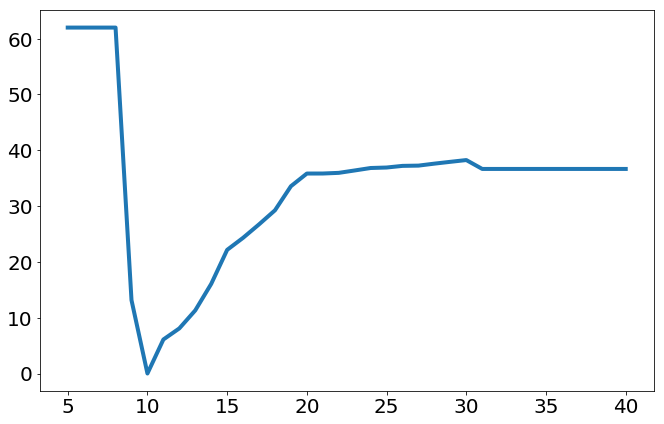

In [140]:
plt.plot(pmf_nd[:,0],pmf_nd[:,1])

In [170]:
for file, data in pmf_files_dict.items():
    pmf_df = postprocessing.read_data_with_hashed_header(file)
    pmf_df.set_index('xi',inplace=True)
    pmf_files_dict[file]['pmf'] = pmf_df

In [171]:
pmf_df.head()

A(xi)
xi           
5   37.388611
6   37.388611
7   37.388611
8   37.388611
9    8.137275

### Overview

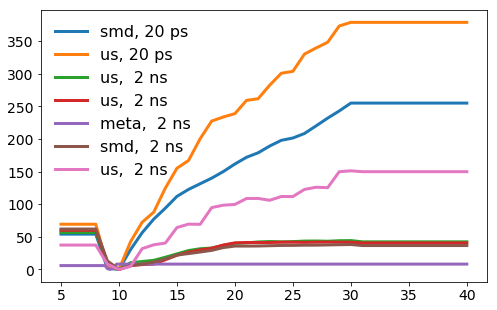

In [223]:
for file, data in pmf_files_dict.items():
    plt.plot(data['pmf'].index, data['pmf'], 
             label="{:s},{: 3d} {:s}".format(
                data['method'], int(data['time']), data['timeUnit'] ) )
plt.legend(frameon=False)

### Umbrella Sampling:

Text(0, 0.5, '$\\Delta E$ [arbitrary energy units]')

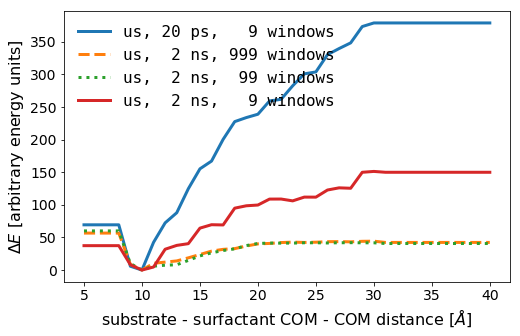

In [206]:
linestyles = ['_','-', '--', ':', '-.']
for i, (file, data) in enumerate(pmf_files_dict.items()):
    if re.match('.*us',data['method']):
        label="{:s},{: 3d} {:s},{: 4d} windows".format(
            data['method'], 
            int(data['time']), 
            data['timeUnit'],
            int(data['windows']) ) 
        plt.plot(data['pmf'].index, data['pmf'], 
            label=label,
            linestyle=linestyles[i%len(linestyles)])
plt.legend(frameon=False,prop={'family': 'monospace'})
plt.xlabel('substrate - surfactant COM - COM distance [$\AA$]')
plt.ylabel('$\Delta E$ [arbitrary energy units]')

Text(0, 0.5, '$\\Delta E$ [arbitrary energy units]')

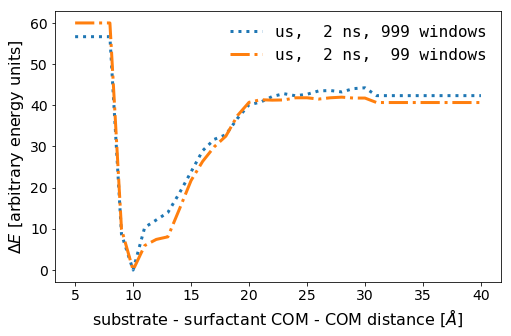

In [214]:
linestyles = ['-', '--', ':', '-.']
for i, (file, data) in enumerate(pmf_files_dict.items()):
    if data['method'] == 'us' and int(data['windows']) >= 99:
        label="{:s},{: 3d} {:s},{: 4d} windows".format(
            data['method'], 
            int(data['time']), 
            data['timeUnit'],
            int(data['windows']) ) 
        plt.plot(data['pmf'].index, data['pmf'], 
            label=label,
            linestyle=linestyles[i%len(linestyles)])
plt.legend(frameon=False,prop={'family': 'monospace'})
plt.xlabel('substrate - surfactant COM - COM distance [$\AA$]')
plt.ylabel('$\Delta E$ [arbitrary energy units]')

### Steered Molecular Dynamics (Slow Growth)

Text(0, 0.5, '$\\Delta E$ [arbitrary energy units]')

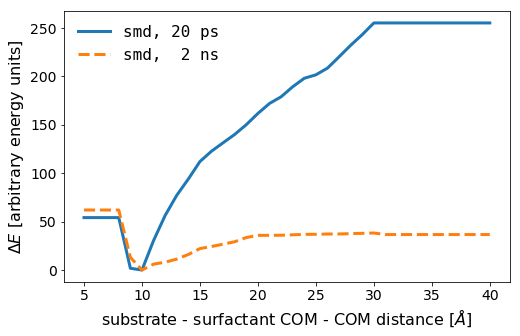

In [218]:
linestyles = ['-', '--', ':', '-.']
for i, (file, data) in enumerate(pmf_files_dict.items()):
    if data['method'] == 'smd':
        label="{:s},{: 3d} {:s}".format(
            data['method'], 
            int(data['time']), 
            data['timeUnit'])  
        plt.plot(data['pmf'].index, data['pmf'], 
            label=label,
            linestyle=linestyles[i%len(linestyles)])
plt.legend(frameon=False,prop={'family': 'monospace'})
plt.xlabel('substrate - surfactant COM - COM distance [$\AA$]')
plt.ylabel('$\Delta E$ [arbitrary energy units]')

Text(0, 0.5, '$\\Delta E$ [arbitrary energy units]')

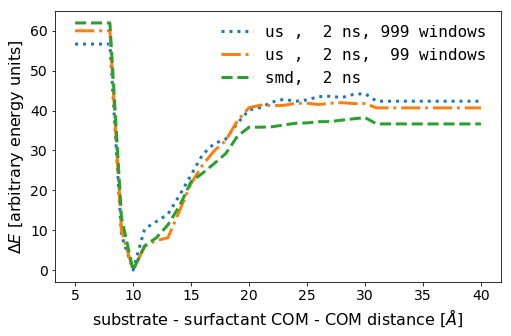

In [222]:
linestyles = ['-', '--', ':', '-.']
for i, (file, data) in enumerate(pmf_files_dict.items()):
    if data['method'] == 'us' and int(data['windows']) >= 99:
        label="{:3s},{: 3d} {:s},{: 4d} windows".format(
            data['method'], 
            int(data['time']), 
            data['timeUnit'],
            int(data['windows']) ) 
        plt.plot(data['pmf'].index, data['pmf'], 
            label=label,
            linestyle=linestyles[i%len(linestyles)])
    elif data['method'] == 'smd' and int(data['time']) == 2:
        label="{:3s},{: 3d} {:s}".format(
            data['method'], 
            int(data['time']), 
            data['timeUnit'])  
        plt.plot(data['pmf'].index, data['pmf'], 
            label=label,
            linestyle=linestyles[i%len(linestyles)])
plt.legend(frameon=False,prop={'family': 'monospace'})
plt.xlabel('substrate - surfactant COM - COM distance [$\AA$]')
plt.ylabel('$\Delta E$ [arbitrary energy units]')

### Metadynamics

In [420]:
prefix = "/mnt/dat/work/testuser/interface/sandbox/20190526_biasing"

In [421]:
os.chdir(prefix)

In [438]:
pmf_files = sorted(glob.glob('1_SDS_on_AU_111_12x7x2*.ti.pmf'))

regex = re.compile('1_SDS_on_AU_111_12x7x2_(?P<time>\d+)_(?P<timeUnit>[^_]+)_(?P<method>[^.]+)\..*')

pmf_files_dict = {}

for pmf_file in pmf_files:
    m = regex.match(pmf_file)
    pmf_files_dict.update(
        {
            pmf_file: {
                'method':   m.group('method'),
                'time':     m.group('time'),
                'timeUnit': m.group('timeUnit')
            }
        }
    )
    m = re.match("(?P<int>\d+)_(?P<float>\d+)_h_meta",
                    pmf_files_dict[pmf_file]['method'])
    if m is not None:
        pmf_files_dict[pmf_file]['method'] = 'meta'
        pmf_files_dict[pmf_file]['peakHeight'] = float( m.group('int') + '.' + m.group('float') )
    elif pmf_files_dict[pmf_file]['method'] == 'meta':
        pmf_files_dict[pmf_file]['peakHeight'] = 0.01

In [439]:
for file, data in pmf_files_dict.items():
    pmf_df = postprocessing.read_data_with_hashed_header(file)
    pmf_df.set_index('xi',inplace=True)
    pmf_files_dict[file]['pmf'] = pmf_df

Text(0, 0.5, '$\\Delta E$ [arbitrary energy units]')

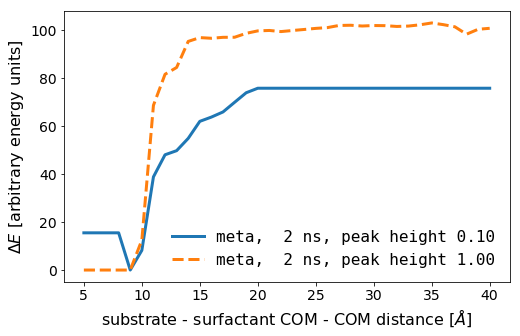

In [441]:
linestyles = ['-', '--', ':', '-.']
for i, (file, data) in enumerate(pmf_files_dict.items()):
    if data['method'] == 'meta':
        label="{:s},{: 3d} {:s}, peak height {:.2f}".format(
            data['method'], 
            int(data['time']), 
            data['timeUnit'],
            data['peakHeight'])  
        plt.plot(data['pmf'].index, data['pmf'], 
            label=label,
            linestyle=linestyles[i%len(linestyles)])
plt.legend(frameon=False,prop={'family': 'monospace'})
plt.xlabel('substrate - surfactant COM - COM distance [$\AA$]')
plt.ylabel('$\Delta E$ [arbitrary energy units]')

In [433]:
pmf_files_dict.keys()

dict_keys(['1_SDS_on_AU_111_12x7x2_2_ns_0_1_h_meta.meta.ti.pmf', '1_SDS_on_AU_111_12x7x2_2_ns_1_0_h_meta.meta.ti.pmf'])

In [436]:
pmf_files_dict['1_SDS_on_AU_111_12x7x2_2_ns_0_1_h_meta.meta.ti.pmf']['method']

'0_1_h_meta'

### Other PMF files

In [249]:
other_pmf_files = sorted(
    set(glob.glob('1_SDS_on_AU_111_12x7x2*.pmf')) - 
    set(glob.glob('1_SDS_on_AU_111_12x7x2*.ti.pmf'))-
    set(glob.glob('1_SDS_on_AU_111_12x7x2*.hist.pmf')))

In [250]:
other_pmf_files

['1_SDS_on_AU_111_12x7x2_2_ns_abf.pmf', '1_SDS_on_AU_111_12x7x2_2_ns_meta.pmf']

In [251]:
with open(other_pmf_files[0],'r') as f:
    for i in range(10):
        print(f.readline(),end='')

# 1
#        4.9       0.2       176  0

 5  8.53673
 5.2  8.53673
 5.4  8.53673
 5.6  8.53673
 5.8  8.53673
 6  8.53673
 6.2  8.53673


In [252]:
other_pmf_files_dict = {}
for pmf_file in other_pmf_files:
    m = regex.match(pmf_file)
    other_pmf_files_dict.update(
        {
            pmf_file: {
                'method':   m.group('method'),
                'time':     m.group('time'),
                'timeUnit': m.group('timeUnit')
            }
        }
    )

In [253]:
other_pmf_files_dict

{'1_SDS_on_AU_111_12x7x2_2_ns_abf.pmf': {'method': 'abf',
  'time': '2',
  'timeUnit': 'ns'},
 '1_SDS_on_AU_111_12x7x2_2_ns_meta.pmf': {'method': 'meta',
  'time': '2',
  'timeUnit': 'ns'}}

In [248]:
with open('1_SDS_on_AU_111_12x7x2_2_ns_abf.hist.pmf') as f:
    for l in f.readlines():
        print(l,end='')

# 1
#        4.9       0.2       176  0

 5  0
 5.2  0
 5.4  0
 5.6  0
 5.8  0
 6  0
 6.2  0
 6.4  0
 6.6  0
 6.8  0
 7  0
 7.2  0
 7.4  0
 7.6  0
 7.8  0
 8  0
 8.2  0
 8.4  0
 8.6  0
 8.8  0
 9  0
 9.2  0
 9.4  0
 9.6  0
 9.8  0
 10  0
 10.2  0
 10.4  0
 10.6  0
 10.8  0
 11  0
 11.2  0
 11.4  0
 11.6  0
 11.8  0
 12  0
 12.2  0
 12.4  0
 12.6  0
 12.8  0
 13  0
 13.2  0
 13.4  0
 13.6  0
 13.8  0
 14  0
 14.2  0
 14.4  0
 14.6  0
 14.8  0
 15  0
 15.2  0
 15.4  0
 15.6  0
 15.8  0
 16  0
 16.2  0
 16.4  0
 16.6  0
 16.8  0
 17  0
 17.2  0
 17.4  0
 17.6  0
 17.8  0
 18  0
 18.2  0
 18.4  0
 18.6  0
 18.8  0
 19  0
 19.2  0
 19.4  0
 19.6  0
 19.8  0
 20  0
 20.2  0
 20.4  0
 20.6  0
 20.8  0
 21  0
 21.2  0
 21.4  0
 21.6  0
 21.8  0
 22  0
 22.2  0
 22.4  0
 22.6  0
 22.8  0
 23  0
 23.2  0
 23.4  0
 23.6  0
 23.8  0
 24  0
 24.2  0
 24.4  0
 24.6  0
 24.8  0
 25  0
 25.2  0
 25.4  0
 25.6  0
 25.8  0
 26  0
 26.2  0
 26.4  0
 26.6  0
 26.8  0
 27  0
 27.2  0
 27.4  0
 27.6  0
 27.

 14  3.71295
 14.2  3.71295
 14.4  3.71295
 14.6  3.71295
 14.8  3.71295
 15  3.71295
 15.2  3.71295
 15.4  3.71295
 15.6  3.71295
 15.8  3.71295
 16  3.71295
 16.2  3.71295
 16.4  3.71295
 16.6  3.71295
 16.8  3.71295
 17  3.71295
 17.2  3.71295
 17.4  3.71295
 17.6  3.71295
 17.8  3.71295
 18  3.71295
 18.2  3.71295
 18.4  3.71295
 18.6  3.71295
 18.8  3.71295
 19  3.71295
 19.2  3.71295
 19.4  3.71295
 19.6  3.71295
 19.8  3.71295
 20  3.71295
 20.2  3.71295
 20.4  3.71295
 20.6  3.71295
 20.8  3.71295
 21  3.71295
 21.2  3.71295
 21.4  3.71295
 21.6  3.71295
 21.8  3.71295
 22  3.71295
 22.2  3.71295
 22.4  3.71295
 22.6  3.71295
 22.8  3.71295
 23  3.71295
 23.2  3.71295
 23.4  3.71295
 23.6  3.71295
 23.8  3.71295
 24  3.71295
 24.2  3.71295
 24.4  3.71295
 24.6  3.71295
 24.8  3.71295
 25  3.71295
 25.2  3.71295
 25.4  3.71295
 25.6  3.71295
 25.8  3.71295
 26  3.71295
 26.2  3.71295
 26.4  3.71295
 26.6  3.71295
 26.8  3.71295
 27  3.71295
 27.2  3.71295
 27.4  3.71295
 27.6  3

 21.6  4.41016
 21.8  4.41016
 22  4.41016
 22.2  4.41016
 22.4  4.41016
 22.6  4.41016
 22.8  4.41016
 23  4.41016
 23.2  4.41016
 23.4  4.41016
 23.6  4.41016
 23.8  4.41016
 24  4.41016
 24.2  4.41016
 24.4  4.41016
 24.6  4.41016
 24.8  4.41016
 25  4.41016
 25.2  4.41016
 25.4  4.41016
 25.6  4.41016
 25.8  4.41016
 26  4.41016
 26.2  4.41016
 26.4  4.41016
 26.6  4.41016
 26.8  4.41016
 27  4.41016
 27.2  4.41016
 27.4  4.41016
 27.6  4.41016
 27.8  4.41016
 28  4.41016
 28.2  4.41016
 28.4  4.41016
 28.6  4.41016
 28.8  4.41016
 29  4.41016
 29.2  4.41016
 29.4  4.41016
 29.6  4.41016
 29.8  4.41016
 30  4.41016
 30.2  4.41016
 30.4  4.41016
 30.6  4.41016
 30.8  4.41016
 31  4.41016
 31.2  4.41016
 31.4  4.41016
 31.6  4.41016
 31.8  4.41016
 32  4.41016
 32.2  4.41016
 32.4  4.41016
 32.6  4.41016
 32.8  4.41016
 33  4.41016
 33.2  4.41016
 33.4  4.41016
 33.6  4.41016
 33.8  4.41016
 34  4.41016
 34.2  4.41016
 34.4  4.41016
 34.6  4.41016
 34.8  4.41016
 35  4.41016
 35.2  4

 12.4  4.62244
 12.6  4.62244
 12.8  4.62244
 13  4.62244
 13.2  4.62244
 13.4  4.62244
 13.6  4.62244
 13.8  4.62244
 14  4.62244
 14.2  4.62244
 14.4  4.62244
 14.6  4.62244
 14.8  4.62244
 15  4.62244
 15.2  4.62244
 15.4  4.62244
 15.6  4.62244
 15.8  4.62244
 16  4.62244
 16.2  4.62244
 16.4  4.62244
 16.6  4.62244
 16.8  4.62244
 17  4.62244
 17.2  4.62244
 17.4  4.62244
 17.6  4.62244
 17.8  4.62244
 18  4.62244
 18.2  4.62244
 18.4  4.62244
 18.6  4.62244
 18.8  4.62244
 19  4.62244
 19.2  4.62244
 19.4  4.62244
 19.6  4.62244
 19.8  4.62244
 20  4.62244
 20.2  4.62244
 20.4  4.62244
 20.6  4.62244
 20.8  4.62244
 21  4.62244
 21.2  4.62244
 21.4  4.62244
 21.6  4.62244
 21.8  4.62244
 22  4.62244
 22.2  4.62244
 22.4  4.62244
 22.6  4.62244
 22.8  4.62244
 23  4.62244
 23.2  4.62244
 23.4  4.62244
 23.6  4.62244
 23.8  4.62244
 24  4.62244
 24.2  4.62244
 24.4  4.62244
 24.6  4.62244
 24.8  4.62244
 25  4.62244
 25.2  4.62244
 25.4  4.62244
 25.6  4.62244
 25.8  4.62244
 26  4

 18.6  4.66575
 18.8  4.66575
 19  4.66575
 19.2  4.66575
 19.4  4.66575
 19.6  4.66575
 19.8  4.66575
 20  4.66575
 20.2  4.66575
 20.4  4.66575
 20.6  4.66575
 20.8  4.66575
 21  4.66575
 21.2  4.66575
 21.4  4.66575
 21.6  4.66575
 21.8  4.66575
 22  4.66575
 22.2  4.66575
 22.4  4.66575
 22.6  4.66575
 22.8  4.66575
 23  4.66575
 23.2  4.66575
 23.4  4.66575
 23.6  4.66575
 23.8  4.66575
 24  4.66575
 24.2  4.66575
 24.4  4.66575
 24.6  4.66575
 24.8  4.66575
 25  4.66575
 25.2  4.66575
 25.4  4.66575
 25.6  4.66575
 25.8  4.66575
 26  4.66575
 26.2  4.66575
 26.4  4.66575
 26.6  4.66575
 26.8  4.66575
 27  4.66575
 27.2  4.66575
 27.4  4.66575
 27.6  4.66575
 27.8  4.66575
 28  4.66575
 28.2  4.66575
 28.4  4.66575
 28.6  4.66575
 28.8  4.66575
 29  4.66575
 29.2  4.66575
 29.4  4.66575
 29.6  4.66575
 29.8  4.66575
 30  4.66575
 30.2  4.66575
 30.4  4.66575
 30.6  4.66575
 30.8  4.66575
 31  4.66575
 31.2  4.66575
 31.4  4.66575
 31.6  4.66575
 31.8  4.66575
 32  4.66575
 32.2  4

 39.6  4.70906
 39.8  4.70906
 40  4.70906

# 1
#        4.9       0.2       176  0

 5  7.14481
 5.2  7.14481
 5.4  7.14481
 5.6  7.14481
 5.8  7.14481
 6  7.14481
 6.2  7.14481
 6.4  7.14481
 6.6  7.14481
 6.8  7.14481
 7  7.14481
 7.2  7.14481
 7.4  7.14481
 7.6  7.14481
 7.8  7.14481
 8  7.14481
 8.2  7.14481
 8.4  7.14481
 8.6  7.14481
 8.8  7.14481
 9  1.81164
 9.2  0
 9.4  1.58965
 9.6  4.71163
 9.8  4.71163
 10  4.71163
 10.2  4.71163
 10.4  4.71163
 10.6  4.71163
 10.8  4.71163
 11  4.71163
 11.2  4.71163
 11.4  4.71163
 11.6  4.71163
 11.8  4.71163
 12  4.71163
 12.2  4.71163
 12.4  4.71163
 12.6  4.71163
 12.8  4.71163
 13  4.71163
 13.2  4.71163
 13.4  4.71163
 13.6  4.71163
 13.8  4.71163
 14  4.71163
 14.2  4.71163
 14.4  4.71163
 14.6  4.71163
 14.8  4.71163
 15  4.71163
 15.2  4.71163
 15.4  4.71163
 15.6  4.71163
 15.8  4.71163
 16  4.71163
 16.2  4.71163
 16.4  4.71163
 16.6  4.71163
 16.8  4.71163
 17  4.71163
 17.2  4.71163
 17.4  4.71163
 17.6  4.71163
 17.8  4.711

 28.2  4.89528
 28.4  4.89528
 28.6  4.89528
 28.8  4.89528
 29  4.89528
 29.2  4.89528
 29.4  4.89528
 29.6  4.89528
 29.8  4.89528
 30  4.89528
 30.2  4.89528
 30.4  4.89528
 30.6  4.89528
 30.8  4.89528
 31  4.89528
 31.2  4.89528
 31.4  4.89528
 31.6  4.89528
 31.8  4.89528
 32  4.89528
 32.2  4.89528
 32.4  4.89528
 32.6  4.89528
 32.8  4.89528
 33  4.89528
 33.2  4.89528
 33.4  4.89528
 33.6  4.89528
 33.8  4.89528
 34  4.89528
 34.2  4.89528
 34.4  4.89528
 34.6  4.89528
 34.8  4.89528
 35  4.89528
 35.2  4.89528
 35.4  4.89528
 35.6  4.89528
 35.8  4.89528
 36  4.89528
 36.2  4.89528
 36.4  4.89528
 36.6  4.89528
 36.8  4.89528
 37  4.89528
 37.2  4.89528
 37.4  4.89528
 37.6  4.89528
 37.8  4.89528
 38  4.89528
 38.2  4.89528
 38.4  4.89528
 38.6  4.89528
 38.8  4.89528
 39  4.89528
 39.2  4.89528
 39.4  4.89528
 39.6  4.89528
 39.8  4.89528
 40  4.89528

# 1
#        4.9       0.2       176  0

 5  7.45958
 5.2  7.45958
 5.4  7.45958
 5.6  7.45958
 5.8  7.45958
 6  7.45958
 6

 22.4  5.10068
 22.6  5.10068
 22.8  5.10068
 23  5.10068
 23.2  5.10068
 23.4  5.10068
 23.6  5.10068
 23.8  5.10068
 24  5.10068
 24.2  5.10068
 24.4  5.10068
 24.6  5.10068
 24.8  5.10068
 25  5.10068
 25.2  5.10068
 25.4  5.10068
 25.6  5.10068
 25.8  5.10068
 26  5.10068
 26.2  5.10068
 26.4  5.10068
 26.6  5.10068
 26.8  5.10068
 27  5.10068
 27.2  5.10068
 27.4  5.10068
 27.6  5.10068
 27.8  5.10068
 28  5.10068
 28.2  5.10068
 28.4  5.10068
 28.6  5.10068
 28.8  5.10068
 29  5.10068
 29.2  5.10068
 29.4  5.10068
 29.6  5.10068
 29.8  5.10068
 30  5.10068
 30.2  5.10068
 30.4  5.10068
 30.6  5.10068
 30.8  5.10068
 31  5.10068
 31.2  5.10068
 31.4  5.10068
 31.6  5.10068
 31.8  5.10068
 32  5.10068
 32.2  5.10068
 32.4  5.10068
 32.6  5.10068
 32.8  5.10068
 33  5.10068
 33.2  5.10068
 33.4  5.10068
 33.6  5.10068
 33.8  5.10068
 34  5.10068
 34.2  5.10068
 34.4  5.10068
 34.6  5.10068
 34.8  5.10068
 35  5.10068
 35.2  5.10068
 35.4  5.10068
 35.6  5.10068
 35.8  5.10068
 36  5

 16.8  8.36377
 17  8.36377
 17.2  8.36377
 17.4  8.36377
 17.6  8.36377
 17.8  8.36377
 18  8.36377
 18.2  8.36377
 18.4  8.36377
 18.6  8.36377
 18.8  8.36377
 19  8.36377
 19.2  8.36377
 19.4  8.36377
 19.6  8.36377
 19.8  8.36377
 20  8.36377
 20.2  8.36377
 20.4  8.36377
 20.6  8.36377
 20.8  8.36377
 21  8.36377
 21.2  8.36377
 21.4  8.36377
 21.6  8.36377
 21.8  8.36377
 22  8.36377
 22.2  8.36377
 22.4  8.36377
 22.6  8.36377
 22.8  8.36377
 23  8.36377
 23.2  8.36377
 23.4  8.36377
 23.6  8.36377
 23.8  8.36377
 24  8.36377
 24.2  8.36377
 24.4  8.36377
 24.6  8.36377
 24.8  8.36377
 25  8.36377
 25.2  8.36377
 25.4  8.36377
 25.6  8.36377
 25.8  8.36377
 26  8.36377
 26.2  8.36377
 26.4  8.36377
 26.6  8.36377
 26.8  8.36377
 27  8.36377
 27.2  8.36377
 27.4  8.36377
 27.6  8.36377
 27.8  8.36377
 28  8.36377
 28.2  8.36377
 28.4  8.36377
 28.6  8.36377
 28.8  8.36377
 29  8.36377
 29.2  8.36377
 29.4  8.36377
 29.6  8.36377
 29.8  8.36377
 30  8.36377
 30.2  8.36377
 30.4  8

 9  1.89719
 9.2  0
 9.4  1.70493
 9.6  5.52281
 9.8  8.55199
 10  8.55199
 10.2  8.55199
 10.4  8.55199
 10.6  8.55199
 10.8  8.55199
 11  8.55199
 11.2  8.55199
 11.4  8.55199
 11.6  8.55199
 11.8  8.55199
 12  8.55199
 12.2  8.55199
 12.4  8.55199
 12.6  8.55199
 12.8  8.55199
 13  8.55199
 13.2  8.55199
 13.4  8.55199
 13.6  8.55199
 13.8  8.55199
 14  8.55199
 14.2  8.55199
 14.4  8.55199
 14.6  8.55199
 14.8  8.55199
 15  8.55199
 15.2  8.55199
 15.4  8.55199
 15.6  8.55199
 15.8  8.55199
 16  8.55199
 16.2  8.55199
 16.4  8.55199
 16.6  8.55199
 16.8  8.55199
 17  8.55199
 17.2  8.55199
 17.4  8.55199
 17.6  8.55199
 17.8  8.55199
 18  8.55199
 18.2  8.55199
 18.4  8.55199
 18.6  8.55199
 18.8  8.55199
 19  8.55199
 19.2  8.55199
 19.4  8.55199
 19.6  8.55199
 19.8  8.55199
 20  8.55199
 20.2  8.55199
 20.4  8.55199
 20.6  8.55199
 20.8  8.55199
 21  8.55199
 21.2  8.55199
 21.4  8.55199
 21.6  8.55199
 21.8  8.55199
 22  8.55199
 22.2  8.55199
 22.4  8.55199
 22.6  8.55199
 22.

 39.8  8.86197
 40  8.86197

# 1
#        4.9       0.2       176  0

 5  8.11395
 5.2  8.11395
 5.4  8.11395
 5.6  8.11395
 5.8  8.11395
 6  8.11395
 6.2  8.11395
 6.4  8.11395
 6.6  8.11395
 6.8  8.11395
 7  8.11395
 7.2  8.11395
 7.4  8.11395
 7.6  8.11395
 7.8  8.11395
 8  8.11395
 8.2  8.11395
 8.4  8.11395
 8.6  8.11395
 8.8  8.11395
 9  1.91726
 9.2  0
 9.4  1.73129
 9.6  5.62578
 9.8  8.86305
 10  8.86305
 10.2  8.86305
 10.4  8.86305
 10.6  8.86305
 10.8  8.86305
 11  8.86305
 11.2  8.86305
 11.4  8.86305
 11.6  8.86305
 11.8  8.86305
 12  8.86305
 12.2  8.86305
 12.4  8.86305
 12.6  8.86305
 12.8  8.86305
 13  8.86305
 13.2  8.86305
 13.4  8.86305
 13.6  8.86305
 13.8  8.86305
 14  8.86305
 14.2  8.86305
 14.4  8.86305
 14.6  8.86305
 14.8  8.86305
 15  8.86305
 15.2  8.86305
 15.4  8.86305
 15.6  8.86305
 15.8  8.86305
 16  8.86305
 16.2  8.86305
 16.4  8.86305
 16.6  8.86305
 16.8  8.86305
 17  8.86305
 17.2  8.86305
 17.4  8.86305
 17.6  8.86305
 17.8  8.86305
 18  8.86305

 11  9.02019
 11.2  9.02019
 11.4  9.02019
 11.6  9.02019
 11.8  9.02019
 12  9.02019
 12.2  9.02019
 12.4  9.02019
 12.6  9.02019
 12.8  9.02019
 13  9.02019
 13.2  9.02019
 13.4  9.02019
 13.6  9.02019
 13.8  9.02019
 14  9.02019
 14.2  9.02019
 14.4  9.02019
 14.6  9.02019
 14.8  9.02019
 15  9.02019
 15.2  9.02019
 15.4  9.02019
 15.6  9.02019
 15.8  9.02019
 16  9.02019
 16.2  9.02019
 16.4  9.02019
 16.6  9.02019
 16.8  9.02019
 17  9.02019
 17.2  9.02019
 17.4  9.02019
 17.6  9.02019
 17.8  9.02019
 18  9.02019
 18.2  9.02019
 18.4  9.02019
 18.6  9.02019
 18.8  9.02019
 19  9.02019
 19.2  9.02019
 19.4  9.02019
 19.6  9.02019
 19.8  9.02019
 20  9.02019
 20.2  9.02019
 20.4  9.02019
 20.6  9.02019
 20.8  9.02019
 21  9.02019
 21.2  9.02019
 21.4  9.02019
 21.6  9.02019
 21.8  9.02019
 22  9.02019
 22.2  9.02019
 22.4  9.02019
 22.6  9.02019
 22.8  9.02019
 23  9.02019
 23.2  9.02019
 23.4  9.02019
 23.6  9.02019
 23.8  9.02019
 24  9.02019
 24.2  9.02019
 24.4  9.02019
 24.6  9

 9.8  9.04417
 10  9.04417
 10.2  9.04417
 10.4  9.04417
 10.6  9.04417
 10.8  9.04417
 11  9.04417
 11.2  9.04417
 11.4  9.04417
 11.6  9.04417
 11.8  9.04417
 12  9.04417
 12.2  9.04417
 12.4  9.04417
 12.6  9.04417
 12.8  9.04417
 13  9.04417
 13.2  9.04417
 13.4  9.04417
 13.6  9.04417
 13.8  9.04417
 14  9.04417
 14.2  9.04417
 14.4  9.04417
 14.6  9.04417
 14.8  9.04417
 15  9.04417
 15.2  9.04417
 15.4  9.04417
 15.6  9.04417
 15.8  9.04417
 16  9.04417
 16.2  9.04417
 16.4  9.04417
 16.6  9.04417
 16.8  9.04417
 17  9.04417
 17.2  9.04417
 17.4  9.04417
 17.6  9.04417
 17.8  9.04417
 18  9.04417
 18.2  9.04417
 18.4  9.04417
 18.6  9.04417
 18.8  9.04417
 19  9.04417
 19.2  9.04417
 19.4  9.04417
 19.6  9.04417
 19.8  9.04417
 20  9.04417
 20.2  9.04417
 20.4  9.04417
 20.6  9.04417
 20.8  9.04417
 21  9.04417
 21.2  9.04417
 21.4  9.04417
 21.6  9.04417
 21.8  9.04417
 22  9.04417
 22.2  9.04417
 22.4  9.04417
 22.6  9.04417
 22.8  9.04417
 23  9.04417
 23.2  9.04417
 23.4  9.


 5  8.4156
 5.2  8.4156
 5.4  8.4156
 5.6  8.4156
 5.8  8.4156
 6  8.4156
 6.2  8.4156
 6.4  8.4156
 6.6  8.4156
 6.8  8.4156
 7  8.4156
 7.2  8.4156
 7.4  8.4156
 7.6  8.4156
 7.8  8.4156
 8  8.4156
 8.2  8.4156
 8.4  8.4156
 8.6  8.4156
 8.8  8.4156
 9  1.95679
 9.2  0
 9.4  1.79074
 9.6  5.77337
 9.8  9.1008
 10  9.1008
 10.2  9.1008
 10.4  9.1008
 10.6  9.1008
 10.8  9.1008
 11  9.1008
 11.2  9.1008
 11.4  9.1008
 11.6  9.1008
 11.8  9.1008
 12  9.1008
 12.2  9.1008
 12.4  9.1008
 12.6  9.1008
 12.8  9.1008
 13  9.1008
 13.2  9.1008
 13.4  9.1008
 13.6  9.1008
 13.8  9.1008
 14  9.1008
 14.2  9.1008
 14.4  9.1008
 14.6  9.1008
 14.8  9.1008
 15  9.1008
 15.2  9.1008
 15.4  9.1008
 15.6  9.1008
 15.8  9.1008
 16  9.1008
 16.2  9.1008
 16.4  9.1008
 16.6  9.1008
 16.8  9.1008
 17  9.1008
 17.2  9.1008
 17.4  9.1008
 17.6  9.1008
 17.8  9.1008
 18  9.1008
 18.2  9.1008
 18.4  9.1008
 18.6  9.1008
 18.8  9.1008
 19  9.1008
 19.2  9.1008
 19.4  9.1008
 19.6  9.1008
 19.8  9.1008
 20  9

 15.2  9.16799
 15.4  9.16799
 15.6  9.16799
 15.8  9.16799
 16  9.16799
 16.2  9.16799
 16.4  9.16799
 16.6  9.16799
 16.8  9.16799
 17  9.16799
 17.2  9.16799
 17.4  9.16799
 17.6  9.16799
 17.8  9.16799
 18  9.16799
 18.2  9.16799
 18.4  9.16799
 18.6  9.16799
 18.8  9.16799
 19  9.16799
 19.2  9.16799
 19.4  9.16799
 19.6  9.16799
 19.8  9.16799
 20  9.16799
 20.2  9.16799
 20.4  9.16799
 20.6  9.16799
 20.8  9.16799
 21  9.16799
 21.2  9.16799
 21.4  9.16799
 21.6  9.16799
 21.8  9.16799
 22  9.16799
 22.2  9.16799
 22.4  9.16799
 22.6  9.16799
 22.8  9.16799
 23  9.16799
 23.2  9.16799
 23.4  9.16799
 23.6  9.16799
 23.8  9.16799
 24  9.16799
 24.2  9.16799
 24.4  9.16799
 24.6  9.16799
 24.8  9.16799
 25  9.16799
 25.2  9.16799
 25.4  9.16799
 25.6  9.16799
 25.8  9.16799
 26  9.16799
 26.2  9.16799
 26.4  9.16799
 26.6  9.16799
 26.8  9.16799
 27  9.16799
 27.2  9.16799
 27.4  9.16799
 27.6  9.16799
 27.8  9.16799
 28  9.16799
 28.2  9.16799
 28.4  9.16799
 28.6  9.16799
 28.8 

 17.6  9.19921
 17.8  9.19921
 18  9.19921
 18.2  9.19921
 18.4  9.19921
 18.6  9.19921
 18.8  9.19921
 19  9.19921
 19.2  9.19921
 19.4  9.19921
 19.6  9.19921
 19.8  9.19921
 20  9.19921
 20.2  9.19921
 20.4  9.19921
 20.6  9.19921
 20.8  9.19921
 21  9.19921
 21.2  9.19921
 21.4  9.19921
 21.6  9.19921
 21.8  9.19921
 22  9.19921
 22.2  9.19921
 22.4  9.19921
 22.6  9.19921
 22.8  9.19921
 23  9.19921
 23.2  9.19921
 23.4  9.19921
 23.6  9.19921
 23.8  9.19921
 24  9.19921
 24.2  9.19921
 24.4  9.19921
 24.6  9.19921
 24.8  9.19921
 25  9.19921
 25.2  9.19921
 25.4  9.19921
 25.6  9.19921
 25.8  9.19921
 26  9.19921
 26.2  9.19921
 26.4  9.19921
 26.6  9.19921
 26.8  9.19921
 27  9.19921
 27.2  9.19921
 27.4  9.19921
 27.6  9.19921
 27.8  9.19921
 28  9.19921
 28.2  9.19921
 28.4  9.19921
 28.6  9.19921
 28.8  9.19921
 29  9.19921
 29.2  9.19921
 29.4  9.19921
 29.6  9.19921
 29.8  9.19921
 30  9.19921
 30.2  9.19921
 30.4  9.19921
 30.6  9.19921
 30.8  9.19921
 31  9.19921
 31.2  9

 30.8  15.4992
 31  15.4992
 31.2  15.4992
 31.4  15.4992
 31.6  15.4992
 31.8  15.4992
 32  15.4992
 32.2  15.4992
 32.4  15.4992
 32.6  15.4992
 32.8  15.4992
 33  15.4992
 33.2  15.4992
 33.4  15.4992
 33.6  15.4992
 33.8  15.4992
 34  15.4992
 34.2  15.4992
 34.4  15.4992
 34.6  15.4992
 34.8  15.4992
 35  15.4992
 35.2  15.4992
 35.4  15.4992
 35.6  15.4992
 35.8  15.4992
 36  15.4992
 36.2  15.4992
 36.4  15.4992
 36.6  15.4992
 36.8  15.4992
 37  15.4992
 37.2  15.4992
 37.4  15.4992
 37.6  15.4992
 37.8  15.4992
 38  15.4992
 38.2  15.4992
 38.4  15.4992
 38.6  15.4992
 38.8  15.4992
 39  15.4992
 39.2  15.4992
 39.4  15.4992
 39.6  15.4992
 39.8  15.4992
 40  15.4992

# 1
#        4.9       0.2       176  0

 5  8.53673
 5.2  8.53673
 5.4  8.53673
 5.6  8.53673
 5.8  8.53673
 6  8.53673
 6.2  8.53673
 6.4  8.53673
 6.6  8.53673
 6.8  8.53673
 7  8.53673
 7.2  8.53673
 7.4  8.53673
 7.6  8.53673
 7.8  8.53673
 8  8.53673
 8.2  8.53673
 8.4  8.53673
 8.6  8.53673
 8.8  8.53673
 

 18.6  20.0689
 18.8  20.0689
 19  20.0689
 19.2  20.0689
 19.4  20.0689
 19.6  20.0689
 19.8  20.0689
 20  20.0689
 20.2  20.0689
 20.4  20.0689
 20.6  20.0689
 20.8  20.0689
 21  20.0689
 21.2  20.0689
 21.4  20.0689
 21.6  20.0689
 21.8  20.0689
 22  20.0689
 22.2  20.0689
 22.4  20.0689
 22.6  20.0689
 22.8  20.0689
 23  20.0689
 23.2  20.0689
 23.4  20.0689
 23.6  20.0689
 23.8  20.0689
 24  20.0689
 24.2  20.0689
 24.4  20.0689
 24.6  20.0689
 24.8  20.0689
 25  20.0689
 25.2  20.0689
 25.4  20.0689
 25.6  20.0689
 25.8  20.0689
 26  20.0689
 26.2  20.0689
 26.4  20.0689
 26.6  20.0689
 26.8  20.0689
 27  20.0689
 27.2  20.0689
 27.4  20.0689
 27.6  20.0689
 27.8  20.0689
 28  20.0689
 28.2  20.0689
 28.4  20.0689
 28.6  20.0689
 28.8  20.0689
 29  20.0689
 29.2  20.0689
 29.4  20.0689
 29.6  20.0689
 29.8  20.0689
 30  20.0689
 30.2  20.0689
 30.4  20.0689
 30.6  20.0689
 30.8  20.0689
 31  20.0689
 31.2  20.0689
 31.4  20.0689
 31.6  20.0689
 31.8  20.0689
 32  20.0689
 32.2  2

 8.2  8.53673
 8.4  8.53673
 8.6  8.53673
 8.8  8.53673
 9  1.97699
 9.2  0
 9.4  1.81442
 9.6  5.8715
 9.8  8.79669
 10  10.4372
 10.2  11.7636
 10.4  11.9308
 10.6  12.4444
 10.8  13.5496
 11  15.271
 11.2  16.1937
 11.4  16.2771
 11.6  17.2666
 11.8  18.5291
 12  19.3785
 12.2  19.3785
 12.4  19.3785
 12.6  19.3785
 12.8  19.3785
 13  19.3785
 13.2  19.3785
 13.4  19.3785
 13.6  19.3785
 13.8  19.3785
 14  19.3785
 14.2  19.3785
 14.4  19.3785
 14.6  19.3785
 14.8  19.3785
 15  19.3785
 15.2  19.3785
 15.4  19.3785
 15.6  19.3785
 15.8  19.3785
 16  19.3785
 16.2  19.3785
 16.4  19.3785
 16.6  19.3785
 16.8  19.3785
 17  19.3785
 17.2  19.3785
 17.4  19.3785
 17.6  19.3785
 17.8  19.3785
 18  19.3785
 18.2  19.3785
 18.4  19.3785
 18.6  19.3785
 18.8  19.3785
 19  19.3785
 19.2  19.3785
 19.4  19.3785
 19.6  19.3785
 19.8  19.3785
 20  19.3785
 20.2  19.3785
 20.4  19.3785
 20.6  19.3785
 20.8  19.3785
 21  19.3785
 21.2  19.3785
 21.4  19.3785
 21.6  19.3785
 21.8  19.3785
 22  19.

 20.6  26.8344
 20.8  26.8344
 21  26.8344
 21.2  26.8344
 21.4  26.8344
 21.6  26.8344
 21.8  26.8344
 22  26.8344
 22.2  26.8344
 22.4  26.8344
 22.6  26.8344
 22.8  26.8344
 23  26.8344
 23.2  26.8344
 23.4  26.8344
 23.6  26.8344
 23.8  26.8344
 24  26.8344
 24.2  26.8344
 24.4  26.8344
 24.6  26.8344
 24.8  26.8344
 25  26.8344
 25.2  26.8344
 25.4  26.8344
 25.6  26.8344
 25.8  26.8344
 26  26.8344
 26.2  26.8344
 26.4  26.8344
 26.6  26.8344
 26.8  26.8344
 27  26.8344
 27.2  26.8344
 27.4  26.8344
 27.6  26.8344
 27.8  26.8344
 28  26.8344
 28.2  26.8344
 28.4  26.8344
 28.6  26.8344
 28.8  26.8344
 29  26.8344
 29.2  26.8344
 29.4  26.8344
 29.6  26.8344
 29.8  26.8344
 30  26.8344
 30.2  26.8344
 30.4  26.8344
 30.6  26.8344
 30.8  26.8344
 31  26.8344
 31.2  26.8344
 31.4  26.8344
 31.6  26.8344
 31.8  26.8344
 32  26.8344
 32.2  26.8344
 32.4  26.8344
 32.6  26.8344
 32.8  26.8344
 33  26.8344
 33.2  26.8344
 33.4  26.8344
 33.6  26.8344
 33.8  26.8344
 34  26.8344
 34.2  2

 26  30.0938
 26.2  30.0938
 26.4  30.0938
 26.6  30.0938
 26.8  30.0938
 27  30.0938
 27.2  30.0938
 27.4  30.0938
 27.6  30.0938
 27.8  30.0938
 28  30.0938
 28.2  30.0938
 28.4  30.0938
 28.6  30.0938
 28.8  30.0938
 29  30.0938
 29.2  30.0938
 29.4  30.0938
 29.6  30.0938
 29.8  30.0938
 30  30.0938
 30.2  30.0938
 30.4  30.0938
 30.6  30.0938
 30.8  30.0938
 31  30.0938
 31.2  30.0938
 31.4  30.0938
 31.6  30.0938
 31.8  30.0938
 32  30.0938
 32.2  30.0938
 32.4  30.0938
 32.6  30.0938
 32.8  30.0938
 33  30.0938
 33.2  30.0938
 33.4  30.0938
 33.6  30.0938
 33.8  30.0938
 34  30.0938
 34.2  30.0938
 34.4  30.0938
 34.6  30.0938
 34.8  30.0938
 35  30.0938
 35.2  30.0938
 35.4  30.0938
 35.6  30.0938
 35.8  30.0938
 36  30.0938
 36.2  30.0938
 36.4  30.0938
 36.6  30.0938
 36.8  30.0938
 37  30.0938
 37.2  30.0938
 37.4  30.0938
 37.6  30.0938
 37.8  30.0938
 38  30.0938
 38.2  30.0938
 38.4  30.0938
 38.6  30.0938
 38.8  30.0938
 39  30.0938
 39.2  30.0938
 39.4  30.0938
 39.6  3

 23.2  31.6349
 23.4  31.6349
 23.6  31.6349
 23.8  31.6349
 24  31.6349
 24.2  31.6349
 24.4  31.6349
 24.6  31.6349
 24.8  31.6349
 25  31.6349
 25.2  31.6349
 25.4  31.6349
 25.6  31.6349
 25.8  31.6349
 26  31.6349
 26.2  31.6349
 26.4  31.6349
 26.6  31.6349
 26.8  31.6349
 27  31.6349
 27.2  31.6349
 27.4  31.6349
 27.6  31.6349
 27.8  31.6349
 28  31.6349
 28.2  31.6349
 28.4  31.6349
 28.6  31.6349
 28.8  31.6349
 29  31.6349
 29.2  31.6349
 29.4  31.6349
 29.6  31.6349
 29.8  31.6349
 30  31.6349
 30.2  31.6349
 30.4  31.6349
 30.6  31.6349
 30.8  31.6349
 31  31.6349
 31.2  31.6349
 31.4  31.6349
 31.6  31.6349
 31.8  31.6349
 32  31.6349
 32.2  31.6349
 32.4  31.6349
 32.6  31.6349
 32.8  31.6349
 33  31.6349
 33.2  31.6349
 33.4  31.6349
 33.6  31.6349
 33.8  31.6349
 34  31.6349
 34.2  31.6349
 34.4  31.6349
 34.6  31.6349
 34.8  31.6349
 35  31.6349
 35.2  31.6349
 35.4  31.6349
 35.6  31.6349
 35.8  31.6349
 36  31.6349
 36.2  31.6349
 36.4  31.6349
 36.6  31.6349
 36.8 

 39.4  35.053
 39.6  35.053
 39.8  35.053
 40  35.053

# 1
#        4.9       0.2       176  0

 5  8.53673
 5.2  8.53673
 5.4  8.53673
 5.6  8.53673
 5.8  8.53673
 6  8.53673
 6.2  8.53673
 6.4  8.53673
 6.6  8.53673
 6.8  8.53673
 7  8.53673
 7.2  8.53673
 7.4  8.53673
 7.6  8.53673
 7.8  8.53673
 8  8.53673
 8.2  8.53673
 8.4  8.53673
 8.6  8.53673
 8.8  8.53673
 9  1.97699
 9.2  0
 9.4  1.81442
 9.6  5.8715
 9.8  8.79669
 10  10.4372
 10.2  11.7636
 10.4  11.9308
 10.6  12.4444
 10.8  13.5496
 11  15.271
 11.2  16.1585
 11.4  16.2432
 11.6  17.2242
 11.8  18.2803
 12  19.6862
 12.2  20.6697
 12.4  21.155
 12.6  22.0962
 12.8  22.6461
 13  22.8386
 13.2  23.3157
 13.4  24.1093
 13.6  25.2593
 13.8  27.2276
 14  28.8996
 14.2  30.654
 14.4  32.0504
 14.6  33.9308
 14.8  34.9982
 15  35.4693
 15.2  35.4693
 15.4  35.4693
 15.6  35.4693
 15.8  35.4693
 16  35.4693
 16.2  35.4693
 16.4  35.4693
 16.6  35.4693
 16.8  35.4693
 17  35.4693
 17.2  35.4693
 17.4  35.4693
 17.6  35.4693
 17.8

 24.8  38.1459
 25  38.1459
 25.2  38.1459
 25.4  38.1459
 25.6  38.1459
 25.8  38.1459
 26  38.1459
 26.2  38.1459
 26.4  38.1459
 26.6  38.1459
 26.8  38.1459
 27  38.1459
 27.2  38.1459
 27.4  38.1459
 27.6  38.1459
 27.8  38.1459
 28  38.1459
 28.2  38.1459
 28.4  38.1459
 28.6  38.1459
 28.8  38.1459
 29  38.1459
 29.2  38.1459
 29.4  38.1459
 29.6  38.1459
 29.8  38.1459
 30  38.1459
 30.2  38.1459
 30.4  38.1459
 30.6  38.1459
 30.8  38.1459
 31  38.1459
 31.2  38.1459
 31.4  38.1459
 31.6  38.1459
 31.8  38.1459
 32  38.1459
 32.2  38.1459
 32.4  38.1459
 32.6  38.1459
 32.8  38.1459
 33  38.1459
 33.2  38.1459
 33.4  38.1459
 33.6  38.1459
 33.8  38.1459
 34  38.1459
 34.2  38.1459
 34.4  38.1459
 34.6  38.1459
 34.8  38.1459
 35  38.1459
 35.2  38.1459
 35.4  38.1459
 35.6  38.1459
 35.8  38.1459
 36  38.1459
 36.2  38.1459
 36.4  38.1459
 36.6  38.1459
 36.8  38.1459
 37  38.1459
 37.2  38.1459
 37.4  38.1459
 37.6  38.1459
 37.8  38.1459
 38  38.1459
 38.2  38.1459
 38.4  3

 34.8  43.9555
 35  43.9555
 35.2  43.9555
 35.4  43.9555
 35.6  43.9555
 35.8  43.9555
 36  43.9555
 36.2  43.9555
 36.4  43.9555
 36.6  43.9555
 36.8  43.9555
 37  43.9555
 37.2  43.9555
 37.4  43.9555
 37.6  43.9555
 37.8  43.9555
 38  43.9555
 38.2  43.9555
 38.4  43.9555
 38.6  43.9555
 38.8  43.9555
 39  43.9555
 39.2  43.9555
 39.4  43.9555
 39.6  43.9555
 39.8  43.9555
 40  43.9555

# 1
#        4.9       0.2       176  0

 5  8.53673
 5.2  8.53673
 5.4  8.53673
 5.6  8.53673
 5.8  8.53673
 6  8.53673
 6.2  8.53673
 6.4  8.53673
 6.6  8.53673
 6.8  8.53673
 7  8.53673
 7.2  8.53673
 7.4  8.53673
 7.6  8.53673
 7.8  8.53673
 8  8.53673
 8.2  8.53673
 8.4  8.53673
 8.6  8.53673
 8.8  8.53673
 9  1.97699
 9.2  0
 9.4  1.81442
 9.6  5.8715
 9.8  8.79669
 10  10.4372
 10.2  11.7636
 10.4  11.9308
 10.6  12.4444
 10.8  13.5496
 11  15.271
 11.2  16.1585
 11.4  16.2432
 11.6  17.2242
 11.8  18.2803
 12  19.6862
 12.2  20.6697
 12.4  21.155
 12.6  22.0962
 12.8  22.6461
 13  22.8386
 1

 11.8  18.2803
 12  19.6862
 12.2  20.6697
 12.4  21.155
 12.6  22.0962
 12.8  22.6461
 13  22.8386
 13.2  23.3157
 13.4  24.1093
 13.6  25.2593
 13.8  27.2276
 14  28.8996
 14.2  30.634
 14.4  31.8531
 14.6  33.6181
 14.8  35.3892
 15  36.8078
 15.2  38.2427
 15.4  39.4946
 15.6  40.4902
 15.8  41.7635
 16  42.6642
 16.2  42.8202
 16.4  42.7106
 16.6  42.9298
 16.8  43.0618
 17  43.8886
 17.2  45.2387
 17.4  45.2387
 17.6  45.2387
 17.8  45.2387
 18  45.2387
 18.2  45.2387
 18.4  45.2387
 18.6  45.2387
 18.8  45.2387
 19  45.2387
 19.2  45.2387
 19.4  45.2387
 19.6  45.2387
 19.8  45.2387
 20  45.2387
 20.2  45.2387
 20.4  45.2387
 20.6  45.2387
 20.8  45.2387
 21  45.2387
 21.2  45.2387
 21.4  45.2387
 21.6  45.2387
 21.8  45.2387
 22  45.2387
 22.2  45.2387
 22.4  45.2387
 22.6  45.2387
 22.8  45.2387
 23  45.2387
 23.2  45.2387
 23.4  45.2387
 23.6  45.2387
 23.8  45.2387
 24  45.2387
 24.2  45.2387
 24.4  45.2387
 24.6  45.2387
 24.8  45.2387
 25  45.2387
 25.2  45.2387
 25.4  45.

 39.6  48.5621
 39.8  48.5621
 40  48.5621

# 1
#        4.9       0.2       176  0

 5  8.53673
 5.2  8.53673
 5.4  8.53673
 5.6  8.53673
 5.8  8.53673
 6  8.53673
 6.2  8.53673
 6.4  8.53673
 6.6  8.53673
 6.8  8.53673
 7  8.53673
 7.2  8.53673
 7.4  8.53673
 7.6  8.53673
 7.8  8.53673
 8  8.53673
 8.2  8.53673
 8.4  8.53673
 8.6  8.53673
 8.8  8.53673
 9  1.97699
 9.2  0
 9.4  1.81442
 9.6  5.8715
 9.8  8.79669
 10  10.4372
 10.2  11.7636
 10.4  11.9308
 10.6  12.4444
 10.8  13.5496
 11  15.271
 11.2  16.1585
 11.4  16.2432
 11.6  17.2242
 11.8  18.2803
 12  19.6862
 12.2  20.6697
 12.4  21.155
 12.6  22.0962
 12.8  22.6461
 13  22.8386
 13.2  23.3157
 13.4  24.1093
 13.6  25.2593
 13.8  27.2276
 14  28.8996
 14.2  30.634
 14.4  31.8531
 14.6  33.6181
 14.8  35.3892
 15  36.8078
 15.2  38.2427
 15.4  39.4946
 15.6  40.4902
 15.8  41.7635
 16  42.579
 16.2  42.5915
 16.4  42.5124
 16.6  42.8408
 16.8  42.9712
 17  43.6065
 17.2  44.2277
 17.4  44.6725
 17.6  45.4725
 17.8  46.712
 18

 34.8  50.894
 35  50.894
 35.2  50.894
 35.4  50.894
 35.6  50.894
 35.8  50.894
 36  50.894
 36.2  50.894
 36.4  50.894
 36.6  50.894
 36.8  50.894
 37  50.894
 37.2  50.894
 37.4  50.894
 37.6  50.894
 37.8  50.894
 38  50.894
 38.2  50.894
 38.4  50.894
 38.6  50.894
 38.8  50.894
 39  50.894
 39.2  50.894
 39.4  50.894
 39.6  50.894
 39.8  50.894
 40  50.894

# 1
#        4.9       0.2       176  0

 5  8.53673
 5.2  8.53673
 5.4  8.53673
 5.6  8.53673
 5.8  8.53673
 6  8.53673
 6.2  8.53673
 6.4  8.53673
 6.6  8.53673
 6.8  8.53673
 7  8.53673
 7.2  8.53673
 7.4  8.53673
 7.6  8.53673
 7.8  8.53673
 8  8.53673
 8.2  8.53673
 8.4  8.53673
 8.6  8.53673
 8.8  8.53673
 9  1.97699
 9.2  0
 9.4  1.81442
 9.6  5.8715
 9.8  8.79669
 10  10.4372
 10.2  11.7636
 10.4  11.9308
 10.6  12.4444
 10.8  13.5496
 11  15.271
 11.2  16.1585
 11.4  16.2432
 11.6  17.2242
 11.8  18.2803
 12  19.6862
 12.2  20.6697
 12.4  21.155
 12.6  22.0962
 12.8  22.6461
 13  22.8386
 13.2  23.3157
 13.4  24.1093

 5.8  8.53673
 6  8.53673
 6.2  8.53673
 6.4  8.53673
 6.6  8.53673
 6.8  8.53673
 7  8.53673
 7.2  8.53673
 7.4  8.53673
 7.6  8.53673
 7.8  8.53673
 8  8.53673
 8.2  8.53673
 8.4  8.53673
 8.6  8.53673
 8.8  8.53673
 9  1.97699
 9.2  0
 9.4  1.81442
 9.6  5.8715
 9.8  8.79669
 10  10.4372
 10.2  11.7636
 10.4  11.9308
 10.6  12.4444
 10.8  13.5496
 11  15.271
 11.2  16.1585
 11.4  16.2432
 11.6  17.2242
 11.8  18.2803
 12  19.6862
 12.2  20.6697
 12.4  21.155
 12.6  22.0962
 12.8  22.6461
 13  22.8386
 13.2  23.3157
 13.4  24.1093
 13.6  25.2593
 13.8  27.2276
 14  28.8996
 14.2  30.634
 14.4  31.8531
 14.6  33.6181
 14.8  35.3892
 15  36.8078
 15.2  38.2427
 15.4  39.4946
 15.6  40.4902
 15.8  41.7635
 16  42.579
 16.2  42.5915
 16.4  42.4469
 16.6  42.7698
 16.8  42.9504
 17  43.6137
 17.2  44.2271
 17.4  44.6497
 17.6  45.4266
 17.8  46.5754
 18  47.3687
 18.2  48.1877
 18.4  48.8323
 18.6  49.5664
 18.8  50.5923
 19  51.601
 19.2  52.4313
 19.4  53.2815
 19.6  53.7616
 19.8  54.2

 27.2  54.9877
 27.4  54.9877
 27.6  54.9877
 27.8  54.9877
 28  54.9877
 28.2  54.9877
 28.4  54.9877
 28.6  54.9877
 28.8  54.9877
 29  54.9877
 29.2  54.9877
 29.4  54.9877
 29.6  54.9877
 29.8  54.9877
 30  54.9877
 30.2  54.9877
 30.4  54.9877
 30.6  54.9877
 30.8  54.9877
 31  54.9877
 31.2  54.9877
 31.4  54.9877
 31.6  54.9877
 31.8  54.9877
 32  54.9877
 32.2  54.9877
 32.4  54.9877
 32.6  54.9877
 32.8  54.9877
 33  54.9877
 33.2  54.9877
 33.4  54.9877
 33.6  54.9877
 33.8  54.9877
 34  54.9877
 34.2  54.9877
 34.4  54.9877
 34.6  54.9877
 34.8  54.9877
 35  54.9877
 35.2  54.9877
 35.4  54.9877
 35.6  54.9877
 35.8  54.9877
 36  54.9877
 36.2  54.9877
 36.4  54.9877
 36.6  54.9877
 36.8  54.9877
 37  54.9877
 37.2  54.9877
 37.4  54.9877
 37.6  54.9877
 37.8  54.9877
 38  54.9877
 38.2  54.9877
 38.4  54.9877
 38.6  54.9877
 38.8  54.9877
 39  54.9877
 39.2  54.9877
 39.4  54.9877
 39.6  54.9877
 39.8  54.9877
 40  54.9877

# 1
#        4.9       0.2       176  0

 5  8.536

 39.4  58.045
 39.6  58.045
 39.8  58.045
 40  58.045

# 1
#        4.9       0.2       176  0

 5  8.53673
 5.2  8.53673
 5.4  8.53673
 5.6  8.53673
 5.8  8.53673
 6  8.53673
 6.2  8.53673
 6.4  8.53673
 6.6  8.53673
 6.8  8.53673
 7  8.53673
 7.2  8.53673
 7.4  8.53673
 7.6  8.53673
 7.8  8.53673
 8  8.53673
 8.2  8.53673
 8.4  8.53673
 8.6  8.53673
 8.8  8.53673
 9  1.97699
 9.2  0
 9.4  1.81442
 9.6  5.8715
 9.8  8.79669
 10  10.4372
 10.2  11.7636
 10.4  11.9308
 10.6  12.4444
 10.8  13.5496
 11  15.271
 11.2  16.1585
 11.4  16.2432
 11.6  17.2242
 11.8  18.2803
 12  19.6862
 12.2  20.6697
 12.4  21.155
 12.6  22.0962
 12.8  22.6461
 13  22.8386
 13.2  23.3157
 13.4  24.1093
 13.6  25.2593
 13.8  27.2276
 14  28.8996
 14.2  30.634
 14.4  31.8531
 14.6  33.6181
 14.8  35.3892
 15  36.8078
 15.2  38.2427
 15.4  39.4946
 15.6  40.4902
 15.8  41.7635
 16  42.579
 16.2  42.5915
 16.4  42.4469
 16.6  42.7698
 16.8  42.9504
 17  43.6137
 17.2  44.2271
 17.4  44.6497
 17.6  45.4266
 17.8 

 38.8  58.8055
 39  58.8055
 39.2  58.8055
 39.4  58.8055
 39.6  58.8055
 39.8  58.8055
 40  58.8055

# 1
#        4.9       0.2       176  0

 5  8.53673
 5.2  8.53673
 5.4  8.53673
 5.6  8.53673
 5.8  8.53673
 6  8.53673
 6.2  8.53673
 6.4  8.53673
 6.6  8.53673
 6.8  8.53673
 7  8.53673
 7.2  8.53673
 7.4  8.53673
 7.6  8.53673
 7.8  8.53673
 8  8.53673
 8.2  8.53673
 8.4  8.53673
 8.6  8.53673
 8.8  8.53673
 9  1.97699
 9.2  0
 9.4  1.81442
 9.6  5.8715
 9.8  8.79669
 10  10.4372
 10.2  11.7636
 10.4  11.9308
 10.6  12.4444
 10.8  13.5496
 11  15.271
 11.2  16.1585
 11.4  16.2432
 11.6  17.2242
 11.8  18.2803
 12  19.6862
 12.2  20.6697
 12.4  21.155
 12.6  22.0962
 12.8  22.6461
 13  22.8386
 13.2  23.3157
 13.4  24.1093
 13.6  25.2593
 13.8  27.2276
 14  28.8996
 14.2  30.634
 14.4  31.8531
 14.6  33.6181
 14.8  35.3892
 15  36.8078
 15.2  38.2427
 15.4  39.4946
 15.6  40.4902
 15.8  41.7635
 16  42.579
 16.2  42.5915
 16.4  42.4469
 16.6  42.7698
 16.8  42.9504
 17  43.6137
 17.

 25  61.2461
 25.2  61.5319
 25.4  62.4427
 25.6  62.4427
 25.8  62.4427
 26  62.4427
 26.2  62.4427
 26.4  62.4427
 26.6  62.4427
 26.8  62.4427
 27  62.4427
 27.2  62.4427
 27.4  62.4427
 27.6  62.4427
 27.8  62.4427
 28  62.4427
 28.2  62.4427
 28.4  62.4427
 28.6  62.4427
 28.8  62.4427
 29  62.4427
 29.2  62.4427
 29.4  62.4427
 29.6  62.4427
 29.8  62.4427
 30  62.4427
 30.2  62.4427
 30.4  62.4427
 30.6  62.4427
 30.8  62.4427
 31  62.4427
 31.2  62.4427
 31.4  62.4427
 31.6  62.4427
 31.8  62.4427
 32  62.4427
 32.2  62.4427
 32.4  62.4427
 32.6  62.4427
 32.8  62.4427
 33  62.4427
 33.2  62.4427
 33.4  62.4427
 33.6  62.4427
 33.8  62.4427
 34  62.4427
 34.2  62.4427
 34.4  62.4427
 34.6  62.4427
 34.8  62.4427
 35  62.4427
 35.2  62.4427
 35.4  62.4427
 35.6  62.4427
 35.8  62.4427
 36  62.4427
 36.2  62.4427
 36.4  62.4427
 36.6  62.4427
 36.8  62.4427
 37  62.4427
 37.2  62.4427
 37.4  62.4427
 37.6  62.4427
 37.8  62.4427
 38  62.4427
 38.2  62.4427
 38.4  62.4427
 38.6  6

 26.4  64.311
 26.6  64.5383
 26.8  64.3968
 27  64.4739
 27.2  64.5027
 27.4  64.3141
 27.6  64.4678
 27.8  64.729
 28  65.8469
 28.2  65.8469
 28.4  65.8469
 28.6  65.8469
 28.8  65.8469
 29  65.8469
 29.2  65.8469
 29.4  65.8469
 29.6  65.8469
 29.8  65.8469
 30  65.8469
 30.2  65.8469
 30.4  65.8469
 30.6  65.8469
 30.8  65.8469
 31  65.8469
 31.2  65.8469
 31.4  65.8469
 31.6  65.8469
 31.8  65.8469
 32  65.8469
 32.2  65.8469
 32.4  65.8469
 32.6  65.8469
 32.8  65.8469
 33  65.8469
 33.2  65.8469
 33.4  65.8469
 33.6  65.8469
 33.8  65.8469
 34  65.8469
 34.2  65.8469
 34.4  65.8469
 34.6  65.8469
 34.8  65.8469
 35  65.8469
 35.2  65.8469
 35.4  65.8469
 35.6  65.8469
 35.8  65.8469
 36  65.8469
 36.2  65.8469
 36.4  65.8469
 36.6  65.8469
 36.8  65.8469
 37  65.8469
 37.2  65.8469
 37.4  65.8469
 37.6  65.8469
 37.8  65.8469
 38  65.8469
 38.2  65.8469
 38.4  65.8469
 38.6  65.8469
 38.8  65.8469
 39  65.8469
 39.2  65.8469
 39.4  65.8469
 39.6  65.8469
 39.8  65.8469
 40  65.

 19.2  52.3191
 19.4  53.1968
 19.6  53.8377
 19.8  54.3052
 20  54.7093
 20.2  55.2386
 20.4  55.7221
 20.6  56.199
 20.8  56.4775
 21  56.7447
 21.2  56.8676
 21.4  56.8211
 21.6  57.1664
 21.8  57.3045
 22  57.484
 22.2  57.6606
 22.4  58.0613
 22.6  58.0735
 22.8  58.1371
 23  58.4645
 23.2  59.1392
 23.4  59.5753
 23.6  59.5745
 23.8  59.5754
 24  59.9076
 24.2  59.8107
 24.4  59.9825
 24.6  59.9881
 24.8  60.4518
 25  60.9018
 25.2  61.5989
 25.4  62.6641
 25.6  62.9711
 25.8  63.1397
 26  63.1143
 26.2  63.9075
 26.4  64.311
 26.6  64.5383
 26.8  64.3968
 27  64.4739
 27.2  64.5027
 27.4  64.3141
 27.6  64.4834
 27.8  64.7763
 28  65.2315
 28.2  65.0552
 28.4  65.1469
 28.6  65.4299
 28.8  65.7291
 29  66.0576
 29.2  66.5374
 29.4  67.2061
 29.6  67.6062
 29.8  67.5504
 30  67.8707
 30.2  68.048
 30.4  68.0983
 30.6  68.5785
 30.8  68.5785
 31  68.5785
 31.2  68.5785
 31.4  68.5785
 31.6  68.5785
 31.8  68.5785
 32  68.5785
 32.2  68.5785
 32.4  68.5785
 32.6  68.5785
 32.8  68.

 24.4  59.9825
 24.6  59.9881
 24.8  60.4518
 25  60.9018
 25.2  61.5989
 25.4  62.6641
 25.6  62.9711
 25.8  63.1397
 26  63.1143
 26.2  63.9075
 26.4  64.311
 26.6  64.5383
 26.8  64.3968
 27  64.4739
 27.2  64.5027
 27.4  64.3141
 27.6  64.4834
 27.8  64.7763
 28  65.2315
 28.2  65.0552
 28.4  65.1469
 28.6  65.4299
 28.8  65.7291
 29  66.046
 29.2  66.5402
 29.4  67.0634
 29.6  67.4316
 29.8  67.4768
 30  67.6851
 30.2  68.0369
 30.4  68.0712
 30.6  68.544
 30.8  69.2212
 31  69.1314
 31.2  69.2549
 31.4  69.4092
 31.6  69.8691
 31.8  70.1408
 32  70.5728
 32.2  70.2856
 32.4  70.405
 32.6  70.802
 32.8  71.8851
 33  71.7632
 33.2  72.2424
 33.4  72.2424
 33.6  72.2424
 33.8  72.2424
 34  72.2424
 34.2  72.2424
 34.4  72.2424
 34.6  72.2424
 34.8  72.2424
 35  72.2424
 35.2  72.2424
 35.4  72.2424
 35.6  72.2424
 35.8  72.2424
 36  72.2424
 36.2  72.2424
 36.4  72.2424
 36.6  72.2424
 36.8  72.2424
 37  72.2424
 37.2  72.2424
 37.4  72.2424
 37.6  72.2424
 37.8  72.2424
 38  72.242

 18.8  50.3803
 19  51.4159
 19.2  52.3191
 19.4  53.1968
 19.6  53.8377
 19.8  54.3052
 20  54.7093
 20.2  55.2386
 20.4  55.7221
 20.6  56.199
 20.8  56.4775
 21  56.7447
 21.2  56.8676
 21.4  56.8211
 21.6  57.1664
 21.8  57.3045
 22  57.484
 22.2  57.6606
 22.4  58.0613
 22.6  58.0735
 22.8  58.1371
 23  58.4645
 23.2  59.1392
 23.4  59.5753
 23.6  59.5745
 23.8  59.5754
 24  59.9076
 24.2  59.8107
 24.4  59.9825
 24.6  59.9881
 24.8  60.4518
 25  60.9018
 25.2  61.5989
 25.4  62.6641
 25.6  62.9711
 25.8  63.1397
 26  63.1143
 26.2  63.9075
 26.4  64.311
 26.6  64.5383
 26.8  64.3968
 27  64.4739
 27.2  64.5027
 27.4  64.3141
 27.6  64.4834
 27.8  64.7763
 28  65.2315
 28.2  65.0552
 28.4  65.1469
 28.6  65.4299
 28.8  65.7291
 29  66.046
 29.2  66.5402
 29.4  67.0634
 29.6  67.4316
 29.8  67.4768
 30  67.6851
 30.2  68.0369
 30.4  68.0712
 30.6  68.544
 30.8  69.2212
 31  69.1314
 31.2  69.2549
 31.4  69.4092
 31.6  69.8691
 31.8  70.1408
 32  70.5728
 32.2  70.2856
 32.4  70.405

 6.8  8.53673
 7  8.53673
 7.2  8.53673
 7.4  8.53673
 7.6  8.53673
 7.8  8.53673
 8  8.53673
 8.2  8.53673
 8.4  8.53673
 8.6  8.53673
 8.8  8.53673
 9  1.97699
 9.2  0
 9.4  1.81442
 9.6  5.8715
 9.8  8.79669
 10  10.4372
 10.2  11.7636
 10.4  11.9308
 10.6  12.4444
 10.8  13.5496
 11  15.271
 11.2  16.1585
 11.4  16.2432
 11.6  17.2242
 11.8  18.2803
 12  19.6862
 12.2  20.6697
 12.4  21.155
 12.6  22.0962
 12.8  22.6461
 13  22.8386
 13.2  23.3157
 13.4  24.1093
 13.6  25.2593
 13.8  27.2276
 14  28.8996
 14.2  30.634
 14.4  31.8531
 14.6  33.6181
 14.8  35.3892
 15  36.8078
 15.2  38.2427
 15.4  39.4946
 15.6  40.4902
 15.8  41.7635
 16  42.579
 16.2  42.5915
 16.4  42.4469
 16.6  42.7698
 16.8  42.9504
 17  43.6137
 17.2  44.2271
 17.4  44.6497
 17.6  45.4266
 17.8  46.5754
 18  47.3687
 18.2  48.1877
 18.4  48.7904
 18.6  49.4261
 18.8  50.3803
 19  51.4159
 19.2  52.3191
 19.4  53.1968
 19.6  53.8377
 19.8  54.3052
 20  54.7093
 20.2  55.2386
 20.4  55.7221
 20.6  56.199
 20.8 

 19.2  52.3191
 19.4  53.1968
 19.6  53.8377
 19.8  54.3052
 20  54.7093
 20.2  55.2386
 20.4  55.7221
 20.6  56.199
 20.8  56.4775
 21  56.7447
 21.2  56.8676
 21.4  56.8211
 21.6  57.1664
 21.8  57.3045
 22  57.484
 22.2  57.6606
 22.4  58.0613
 22.6  58.0735
 22.8  58.1371
 23  58.4645
 23.2  59.1392
 23.4  59.5753
 23.6  59.5745
 23.8  59.5754
 24  59.9076
 24.2  59.8107
 24.4  59.9825
 24.6  59.9881
 24.8  60.4518
 25  60.9018
 25.2  61.5989
 25.4  62.6641
 25.6  62.9711
 25.8  63.1397
 26  63.1143
 26.2  63.9075
 26.4  64.311
 26.6  64.5383
 26.8  64.3968
 27  64.4739
 27.2  64.5027
 27.4  64.3141
 27.6  64.4834
 27.8  64.7763
 28  65.2315
 28.2  65.0552
 28.4  65.1469
 28.6  65.4299
 28.8  65.7291
 29  66.046
 29.2  66.5402
 29.4  67.0634
 29.6  67.4316
 29.8  67.4768
 30  67.6851
 30.2  68.0369
 30.4  68.0712
 30.6  68.544
 30.8  69.2212
 31  69.1314
 31.2  69.2549
 31.4  69.4092
 31.6  69.8691
 31.8  70.1408
 32  70.5728
 32.2  70.2856
 32.4  70.405
 32.6  70.802
 32.8  71.788

 9.8  8.79669
 10  10.4372
 10.2  11.7636
 10.4  11.9308
 10.6  12.4444
 10.8  13.5496
 11  15.271
 11.2  16.1585
 11.4  16.2432
 11.6  17.2242
 11.8  18.2803
 12  19.6862
 12.2  20.6697
 12.4  21.155
 12.6  22.0962
 12.8  22.6461
 13  22.8386
 13.2  23.3157
 13.4  24.1093
 13.6  25.2593
 13.8  27.2276
 14  28.8996
 14.2  30.634
 14.4  31.8531
 14.6  33.6181
 14.8  35.3892
 15  36.8078
 15.2  38.2427
 15.4  39.4946
 15.6  40.4902
 15.8  41.7635
 16  42.579
 16.2  42.5915
 16.4  42.4469
 16.6  42.7698
 16.8  42.9504
 17  43.6137
 17.2  44.2271
 17.4  44.6497
 17.6  45.4266
 17.8  46.5754
 18  47.3687
 18.2  48.1877
 18.4  48.7904
 18.6  49.4261
 18.8  50.3803
 19  51.4159
 19.2  52.3191
 19.4  53.1968
 19.6  53.8377
 19.8  54.3052
 20  54.7093
 20.2  55.2386
 20.4  55.7221
 20.6  56.199
 20.8  56.4775
 21  56.7447
 21.2  56.8676
 21.4  56.8211
 21.6  57.1664
 21.8  57.3045
 22  57.484
 22.2  57.6606
 22.4  58.0613
 22.6  58.0735
 22.8  58.1371
 23  58.4645
 23.2  59.1392
 23.4  59.5753


 36.2  77.1538
 36.4  78.079
 36.6  78.7571
 36.8  79.0824
 37  79.2355
 37.2  79.4443
 37.4  80.0607
 37.6  80.0961
 37.8  80.4284
 38  80.9163
 38.2  81.6888
 38.4  82.3255
 38.6  83.1105
 38.8  83.6849
 39  84.6132
 39.2  85.8705
 39.4  85.8705
 39.6  85.8705
 39.8  85.8705
 40  85.8705

# 1
#        4.9       0.2       176  0

 5  8.53673
 5.2  8.53673
 5.4  8.53673
 5.6  8.53673
 5.8  8.53673
 6  8.53673
 6.2  8.53673
 6.4  8.53673
 6.6  8.53673
 6.8  8.53673
 7  8.53673
 7.2  8.53673
 7.4  8.53673
 7.6  8.53673
 7.8  8.53673
 8  8.53673
 8.2  8.53673
 8.4  8.53673
 8.6  8.53673
 8.8  8.53673
 9  1.97699
 9.2  0
 9.4  1.81442
 9.6  5.8715
 9.8  8.79669
 10  10.4372
 10.2  11.7636
 10.4  11.9308
 10.6  12.4444
 10.8  13.5496
 11  15.271
 11.2  16.1585
 11.4  16.2432
 11.6  17.2242
 11.8  18.2803
 12  19.6862
 12.2  20.6697
 12.4  21.155
 12.6  22.0962
 12.8  22.6461
 13  22.8386
 13.2  23.3157
 13.4  24.1093
 13.6  25.2593
 13.8  27.2276
 14  28.8996
 14.2  30.634
 14.4  31.8531
 1

 28.6  65.4299
 28.8  65.7291
 29  66.046
 29.2  66.5402
 29.4  67.0634
 29.6  67.4316
 29.8  67.4768
 30  67.6851
 30.2  68.0369
 30.4  68.0712
 30.6  68.544
 30.8  69.2212
 31  69.1314
 31.2  69.2549
 31.4  69.4092
 31.6  69.8691
 31.8  70.1408
 32  70.5728
 32.2  70.2856
 32.4  70.405
 32.6  70.802
 32.8  71.7883
 33  71.9203
 33.2  72.3152
 33.4  72.5047
 33.6  72.7691
 33.8  72.8802
 34  73.1006
 34.2  73.3025
 34.4  73.7554
 34.6  74.4429
 34.8  74.9019
 35  74.8771
 35.2  75.0584
 35.4  75.1632
 35.6  75.5598
 35.8  76.1731
 36  76.8297
 36.2  77.1538
 36.4  78.079
 36.6  78.7571
 36.8  79.0824
 37  79.2355
 37.2  79.4443
 37.4  80.0607
 37.6  80.0961
 37.8  80.4284
 38  80.9163
 38.2  81.669
 38.4  82.2684
 38.6  83.039
 38.8  83.6749
 39  84.674
 39.2  85.3944
 39.4  85.7427
 39.6  86.255
 39.8  86.5734
 40  86.5144

# 1
#        4.9       0.2       176  0

 5  8.53673
 5.2  8.53673
 5.4  8.53673
 5.6  8.53673
 5.8  8.53673
 6  8.53673
 6.2  8.53673
 6.4  8.53673
 6.6  8.53673

 16  42.579
 16.2  42.5915
 16.4  42.4469
 16.6  42.7698
 16.8  42.9504
 17  43.6137
 17.2  44.2271
 17.4  44.6497
 17.6  45.4266
 17.8  46.5754
 18  47.3687
 18.2  48.1877
 18.4  48.7904
 18.6  49.4261
 18.8  50.3803
 19  51.4159
 19.2  52.3191
 19.4  53.1968
 19.6  53.8377
 19.8  54.3052
 20  54.7093
 20.2  55.2386
 20.4  55.7221
 20.6  56.199
 20.8  56.4775
 21  56.7447
 21.2  56.8676
 21.4  56.8211
 21.6  57.1664
 21.8  57.3045
 22  57.484
 22.2  57.6606
 22.4  58.0613
 22.6  58.0735
 22.8  58.1371
 23  58.4645
 23.2  59.1392
 23.4  59.5753
 23.6  59.5745
 23.8  59.5754
 24  59.9076
 24.2  59.8107
 24.4  59.9825
 24.6  59.9881
 24.8  60.4518
 25  60.9018
 25.2  61.5989
 25.4  62.6641
 25.6  62.9711
 25.8  63.1397
 26  63.1143
 26.2  63.9075
 26.4  64.311
 26.6  64.5383
 26.8  64.3968
 27  64.4739
 27.2  64.5027
 27.4  64.3141
 27.6  64.4834
 27.8  64.7763
 28  65.2315
 28.2  65.0552
 28.4  65.1469
 28.6  65.4299
 28.8  65.7291
 29  66.046
 29.2  66.5402
 29.4  67.0634
 29.6  67.431

 25.4  62.6641
 25.6  62.9711
 25.8  63.1397
 26  63.1143
 26.2  63.9075
 26.4  64.311
 26.6  64.5383
 26.8  64.3968
 27  64.4739
 27.2  64.5027
 27.4  64.3141
 27.6  64.4834
 27.8  64.7763
 28  65.2315
 28.2  65.0552
 28.4  65.1469
 28.6  65.4299
 28.8  65.7291
 29  66.046
 29.2  66.5402
 29.4  67.0634
 29.6  67.4316
 29.8  67.4768
 30  67.6851
 30.2  68.0369
 30.4  68.0712
 30.6  68.544
 30.8  69.2212
 31  69.1314
 31.2  69.2549
 31.4  69.4092
 31.6  69.8691
 31.8  70.1408
 32  70.5728
 32.2  70.2856
 32.4  70.405
 32.6  70.802
 32.8  71.7883
 33  71.9203
 33.2  72.3152
 33.4  72.5047
 33.6  72.7691
 33.8  72.8802
 34  73.1006
 34.2  73.3025
 34.4  73.7554
 34.6  74.4429
 34.8  74.9019
 35  74.8771
 35.2  75.0584
 35.4  75.1632
 35.6  75.5598
 35.8  76.1731
 36  76.8297
 36.2  77.1538
 36.4  78.079
 36.6  78.7571
 36.8  79.0824
 37  79.2355
 37.2  79.4443
 37.4  80.0607
 37.6  80.0961
 37.8  80.4284
 38  80.9163
 38.2  81.669
 38.4  82.2684
 38.6  83.039
 38.8  83.6749
 39  84.674
 3

 5.8  8.53673
 6  8.53673
 6.2  8.53673
 6.4  8.53673
 6.6  8.53673
 6.8  8.53673
 7  8.53673
 7.2  8.53673
 7.4  8.53673
 7.6  8.53673
 7.8  8.53673
 8  8.53673
 8.2  8.53673
 8.4  8.53673
 8.6  8.53673
 8.8  8.53673
 9  1.97699
 9.2  0
 9.4  1.81442
 9.6  5.8715
 9.8  8.79669
 10  10.4372
 10.2  11.7636
 10.4  11.9308
 10.6  12.4444
 10.8  13.5496
 11  15.271
 11.2  16.1585
 11.4  16.2432
 11.6  17.2242
 11.8  18.2803
 12  19.6862
 12.2  20.6697
 12.4  21.155
 12.6  22.0962
 12.8  22.6461
 13  22.8386
 13.2  23.3157
 13.4  24.1093
 13.6  25.2593
 13.8  27.2276
 14  28.8996
 14.2  30.634
 14.4  31.8531
 14.6  33.6181
 14.8  35.3892
 15  36.8078
 15.2  38.2427
 15.4  39.4946
 15.6  40.4902
 15.8  41.7635
 16  42.579
 16.2  42.5915
 16.4  42.4469
 16.6  42.7698
 16.8  42.9504
 17  43.6137
 17.2  44.2271
 17.4  44.6497
 17.6  45.4266
 17.8  46.5754
 18  47.3687
 18.2  48.1877
 18.4  48.7904
 18.6  49.4261
 18.8  50.3803
 19  51.4159
 19.2  52.3191
 19.4  53.1968
 19.6  53.8377
 19.8  54.

 5  8.53673
 5.2  8.53673
 5.4  8.53673
 5.6  8.53673
 5.8  8.53673
 6  8.53673
 6.2  8.53673
 6.4  8.53673
 6.6  8.53673
 6.8  8.53673
 7  8.53673
 7.2  8.53673
 7.4  8.53673
 7.6  8.53673
 7.8  8.53673
 8  8.53673
 8.2  8.53673
 8.4  8.53673
 8.6  8.53673
 8.8  8.53673
 9  1.97699
 9.2  0
 9.4  1.81442
 9.6  5.8715
 9.8  8.79669
 10  10.4372
 10.2  11.7636
 10.4  11.9308
 10.6  12.4444
 10.8  13.5496
 11  15.271
 11.2  16.1585
 11.4  16.2432
 11.6  17.2242
 11.8  18.2803
 12  19.6862
 12.2  20.6697
 12.4  21.155
 12.6  22.0962
 12.8  22.6461
 13  22.8386
 13.2  23.3157
 13.4  24.1093
 13.6  25.2593
 13.8  27.2276
 14  28.8996
 14.2  30.634
 14.4  31.8531
 14.6  33.6181
 14.8  35.3892
 15  36.8078
 15.2  38.2427
 15.4  39.4946
 15.6  40.4902
 15.8  41.7635
 16  42.579
 16.2  42.5915
 16.4  42.4469
 16.6  42.7698
 16.8  42.9504
 17  43.6137
 17.2  44.2271
 17.4  44.6497
 17.6  45.4266
 17.8  46.5754
 18  47.3687
 18.2  48.1877
 18.4  48.7904
 18.6  49.4261
 18.8  50.3803
 19  51.4159
 

 37.2  79.4443
 37.4  80.0607
 37.6  80.0961
 37.8  80.4284
 38  80.9163
 38.2  81.669
 38.4  82.2684
 38.6  83.039
 38.8  83.6749
 39  84.674
 39.2  85.3944
 39.4  85.6171
 39.6  85.99
 39.8  85.9512
 40  85.5783

# 1
#        4.9       0.2       176  0

 5  8.53673
 5.2  8.53673
 5.4  8.53673
 5.6  8.53673
 5.8  8.53673
 6  8.53673
 6.2  8.53673
 6.4  8.53673
 6.6  8.53673
 6.8  8.53673
 7  8.53673
 7.2  8.53673
 7.4  8.53673
 7.6  8.53673
 7.8  8.53673
 8  8.53673
 8.2  8.53673
 8.4  8.53673
 8.6  8.53673
 8.8  8.53673
 9  1.97699
 9.2  0
 9.4  1.81442
 9.6  5.8715
 9.8  8.79669
 10  10.4372
 10.2  11.7636
 10.4  11.9308
 10.6  12.4444
 10.8  13.5496
 11  15.271
 11.2  16.1585
 11.4  16.2432
 11.6  17.2242
 11.8  18.2803
 12  19.6862
 12.2  20.6697
 12.4  21.155
 12.6  22.0962
 12.8  22.6461
 13  22.8386
 13.2  23.3157
 13.4  24.1093
 13.6  25.2593
 13.8  27.2276
 14  28.8996
 14.2  30.634
 14.4  31.8531
 14.6  33.6181
 14.8  35.3892
 15  36.8078
 15.2  38.2427
 15.4  39.4946
 15.6 

 12.2  20.6697
 12.4  21.155
 12.6  22.0962
 12.8  22.6461
 13  22.8386
 13.2  23.3157
 13.4  24.1093
 13.6  25.2593
 13.8  27.2276
 14  28.8996
 14.2  30.634
 14.4  31.8531
 14.6  33.6181
 14.8  35.3892
 15  36.8078
 15.2  38.2427
 15.4  39.4946
 15.6  40.4902
 15.8  41.7635
 16  42.579
 16.2  42.5915
 16.4  42.4469
 16.6  42.7698
 16.8  42.9504
 17  43.6137
 17.2  44.2271
 17.4  44.6497
 17.6  45.4266
 17.8  46.5754
 18  47.3687
 18.2  48.1877
 18.4  48.7904
 18.6  49.4261
 18.8  50.3803
 19  51.4159
 19.2  52.3191
 19.4  53.1968
 19.6  53.8377
 19.8  54.3052
 20  54.7093
 20.2  55.2386
 20.4  55.7221
 20.6  56.199
 20.8  56.4775
 21  56.7447
 21.2  56.8676
 21.4  56.8211
 21.6  57.1664
 21.8  57.3045
 22  57.484
 22.2  57.6606
 22.4  58.0613
 22.6  58.0735
 22.8  58.1371
 23  58.4645
 23.2  59.1392
 23.4  59.5753
 23.6  59.5745
 23.8  59.5754
 24  59.9076
 24.2  59.8107
 24.4  59.9825
 24.6  59.9881
 24.8  60.4518
 25  60.9018
 25.2  61.5989
 25.4  62.6641
 25.6  62.9711
 25.8  63.1

 9  1.97699
 9.2  0
 9.4  1.81442
 9.6  5.8715
 9.8  8.79669
 10  10.4372
 10.2  11.7636
 10.4  11.9308
 10.6  12.4444
 10.8  13.5496
 11  15.271
 11.2  16.1585
 11.4  16.2432
 11.6  17.2242
 11.8  18.2803
 12  19.6862
 12.2  20.6697
 12.4  21.155
 12.6  22.0962
 12.8  22.6461
 13  22.8386
 13.2  23.3157
 13.4  24.1093
 13.6  25.2593
 13.8  27.2276
 14  28.8996
 14.2  30.634
 14.4  31.8531
 14.6  33.6181
 14.8  35.3892
 15  36.8078
 15.2  38.2427
 15.4  39.4946
 15.6  40.4902
 15.8  41.7635
 16  42.579
 16.2  42.5915
 16.4  42.4469
 16.6  42.7698
 16.8  42.9504
 17  43.6137
 17.2  44.2271
 17.4  44.6497
 17.6  45.4266
 17.8  46.5754
 18  47.3687
 18.2  48.1877
 18.4  48.7904
 18.6  49.4261
 18.8  50.3803
 19  51.4159
 19.2  52.3191
 19.4  53.1968
 19.6  53.8377
 19.8  54.3052
 20  54.7093
 20.2  55.2386
 20.4  55.7221
 20.6  56.199
 20.8  56.4775
 21  56.7447
 21.2  56.8676
 21.4  56.8211
 21.6  57.1664
 21.8  57.3045
 22  57.484
 22.2  57.6606
 22.4  58.0613
 22.6  58.0735
 22.8  58.1


 5  8.53673
 5.2  8.53673
 5.4  8.53673
 5.6  8.53673
 5.8  8.53673
 6  8.53673
 6.2  8.53673
 6.4  8.53673
 6.6  8.53673
 6.8  8.53673
 7  8.53673
 7.2  8.53673
 7.4  8.53673
 7.6  8.53673
 7.8  8.53673
 8  8.53673
 8.2  8.53673
 8.4  8.53673
 8.6  8.53673
 8.8  8.53673
 9  1.97699
 9.2  0
 9.4  1.81442
 9.6  5.8715
 9.8  8.79669
 10  10.4372
 10.2  11.7636
 10.4  11.9308
 10.6  12.4444
 10.8  13.5496
 11  15.271
 11.2  16.1585
 11.4  16.2432
 11.6  17.2242
 11.8  18.2803
 12  19.6862
 12.2  20.6697
 12.4  21.155
 12.6  22.0962
 12.8  22.6461
 13  22.8386
 13.2  23.3157
 13.4  24.1093
 13.6  25.2593
 13.8  27.2276
 14  28.8996
 14.2  30.634
 14.4  31.8531
 14.6  33.6181
 14.8  35.3892
 15  36.8078
 15.2  38.2427
 15.4  39.4946
 15.6  40.4902
 15.8  41.7635
 16  42.579
 16.2  42.5915
 16.4  42.4469
 16.6  42.7698
 16.8  42.9504
 17  43.6137
 17.2  44.2271
 17.4  44.6497
 17.6  45.4266
 17.8  46.5754
 18  47.3687
 18.2  48.1877
 18.4  48.7904
 18.6  49.4261
 18.8  50.3803
 19  51.4159


 21  56.7447
 21.2  56.8676
 21.4  56.8211
 21.6  57.1664
 21.8  57.3045
 22  57.484
 22.2  57.6606
 22.4  58.0613
 22.6  58.0735
 22.8  58.1371
 23  58.4645
 23.2  59.1392
 23.4  59.5753
 23.6  59.5745
 23.8  59.5754
 24  59.9076
 24.2  59.8107
 24.4  59.9825
 24.6  59.9881
 24.8  60.4518
 25  60.9018
 25.2  61.5989
 25.4  62.6641
 25.6  62.9711
 25.8  63.1397
 26  63.1143
 26.2  63.9075
 26.4  64.311
 26.6  64.5383
 26.8  64.3968
 27  64.4739
 27.2  64.5027
 27.4  64.3141
 27.6  64.4834
 27.8  64.7763
 28  65.2315
 28.2  65.0552
 28.4  65.1469
 28.6  65.4299
 28.8  65.7291
 29  66.046
 29.2  66.5402
 29.4  67.0634
 29.6  67.4316
 29.8  67.4768
 30  67.6851
 30.2  68.0369
 30.4  68.0712
 30.6  68.544
 30.8  69.2212
 31  69.1314
 31.2  69.2549
 31.4  69.4092
 31.6  69.8691
 31.8  70.1408
 32  70.5728
 32.2  70.2856
 32.4  70.405
 32.6  70.802
 32.8  71.7883
 33  71.9203
 33.2  72.3152
 33.4  72.5047
 33.6  72.7691
 33.8  72.8802
 34  73.1006
 34.2  73.3025
 34.4  73.7554
 34.6  74.4429

 8.8  8.53673
 9  1.97699
 9.2  0
 9.4  1.81442
 9.6  5.8715
 9.8  8.79669
 10  10.4372
 10.2  11.7636
 10.4  11.9308
 10.6  12.4444
 10.8  13.5496
 11  15.271
 11.2  16.1585
 11.4  16.2432
 11.6  17.2242
 11.8  18.2803
 12  19.6862
 12.2  20.6697
 12.4  21.155
 12.6  22.0962
 12.8  22.6461
 13  22.8386
 13.2  23.3157
 13.4  24.1093
 13.6  25.2593
 13.8  27.2276
 14  28.8996
 14.2  30.634
 14.4  31.8531
 14.6  33.6181
 14.8  35.3892
 15  36.8078
 15.2  38.2427
 15.4  39.4946
 15.6  40.4902
 15.8  41.7635
 16  42.579
 16.2  42.5915
 16.4  42.4469
 16.6  42.7698
 16.8  42.9504
 17  43.6137
 17.2  44.2271
 17.4  44.6497
 17.6  45.4266
 17.8  46.5754
 18  47.3687
 18.2  48.1877
 18.4  48.7904
 18.6  49.4261
 18.8  50.3803
 19  51.4159
 19.2  52.3191
 19.4  53.1968
 19.6  53.8377
 19.8  54.3052
 20  54.7093
 20.2  55.2386
 20.4  55.7221
 20.6  56.199
 20.8  56.4775
 21  56.7447
 21.2  56.8676
 21.4  56.8211
 21.6  57.1664
 21.8  57.3045
 22  57.484
 22.2  57.6606
 22.4  58.0613
 22.6  58.07

 39.8  85.0796
 40  84.779

# 1
#        4.9       0.2       176  0

 5  8.53673
 5.2  8.53673
 5.4  8.53673
 5.6  8.53673
 5.8  8.53673
 6  8.53673
 6.2  8.53673
 6.4  8.53673
 6.6  8.53673
 6.8  8.53673
 7  8.53673
 7.2  8.53673
 7.4  8.53673
 7.6  8.53673
 7.8  8.53673
 8  8.53673
 8.2  8.53673
 8.4  8.53673
 8.6  8.53673
 8.8  8.53673
 9  1.97699
 9.2  0
 9.4  1.81442
 9.6  5.8715
 9.8  8.79669
 10  10.4372
 10.2  11.7636
 10.4  11.9308
 10.6  12.4444
 10.8  13.5496
 11  15.271
 11.2  16.1585
 11.4  16.2432
 11.6  17.2242
 11.8  18.2803
 12  19.6862
 12.2  20.6697
 12.4  21.155
 12.6  22.0962
 12.8  22.6461
 13  22.8386
 13.2  23.3157
 13.4  24.1093
 13.6  25.2593
 13.8  27.2276
 14  28.8996
 14.2  30.634
 14.4  31.8531
 14.6  33.6181
 14.8  35.3892
 15  36.8078
 15.2  38.2427
 15.4  39.4946
 15.6  40.4902
 15.8  41.7635
 16  42.579
 16.2  42.5915
 16.4  42.4469
 16.6  42.7698
 16.8  42.9504
 17  43.6137
 17.2  44.2271
 17.4  44.6497
 17.6  45.4266
 17.8  46.5754
 18  47.3687
 18.2

 26  63.1143
 26.2  63.9075
 26.4  64.311
 26.6  64.5383
 26.8  64.3968
 27  64.4739
 27.2  64.5027
 27.4  64.3141
 27.6  64.4834
 27.8  64.7763
 28  65.2315
 28.2  65.0552
 28.4  65.1469
 28.6  65.4299
 28.8  65.7291
 29  66.046
 29.2  66.5402
 29.4  67.0634
 29.6  67.4316
 29.8  67.4768
 30  67.6851
 30.2  68.0369
 30.4  68.0712
 30.6  68.544
 30.8  69.2212
 31  69.1314
 31.2  69.2549
 31.4  69.4092
 31.6  69.8691
 31.8  70.1408
 32  70.5728
 32.2  70.2856
 32.4  70.405
 32.6  70.802
 32.8  71.7883
 33  71.9203
 33.2  72.3152
 33.4  72.5047
 33.6  72.7691
 33.8  72.8802
 34  73.1006
 34.2  73.3025
 34.4  73.7554
 34.6  74.4429
 34.8  74.9019
 35  74.8771
 35.2  75.0584
 35.4  75.1632
 35.6  75.5598
 35.8  76.1731
 36  76.8297
 36.2  77.1538
 36.4  78.079
 36.6  78.7571
 36.8  79.0824
 37  79.2355
 37.2  79.4443
 37.4  80.0607
 37.6  80.0961
 37.8  80.4284
 38  80.9163
 38.2  81.669
 38.4  82.2453
 38.6  82.9505
 38.8  83.4367
 39  84.0359
 39.2  84.6495
 39.4  84.8049
 39.6  85.0917


 33.4  72.5047
 33.6  72.7691
 33.8  72.8802
 34  73.1006
 34.2  73.3025
 34.4  73.7554
 34.6  74.4429
 34.8  74.9019
 35  74.8771
 35.2  75.0584
 35.4  75.1632
 35.6  75.5598
 35.8  76.1731
 36  76.8297
 36.2  77.1538
 36.4  78.079
 36.6  78.7571
 36.8  79.0824
 37  79.2355
 37.2  79.4443
 37.4  80.0607
 37.6  80.0961
 37.8  80.4284
 38  80.9163
 38.2  81.669
 38.4  82.2453
 38.6  82.9505
 38.8  83.4367
 39  84.0273
 39.2  84.6188
 39.4  84.749
 39.6  85.0232
 39.8  85.0331
 40  84.7429

# 1
#        4.9       0.2       176  0

 5  8.53673
 5.2  8.53673
 5.4  8.53673
 5.6  8.53673
 5.8  8.53673
 6  8.53673
 6.2  8.53673
 6.4  8.53673
 6.6  8.53673
 6.8  8.53673
 7  8.53673
 7.2  8.53673
 7.4  8.53673
 7.6  8.53673
 7.8  8.53673
 8  8.53673
 8.2  8.53673
 8.4  8.53673
 8.6  8.53673
 8.8  8.53673
 9  1.97699
 9.2  0
 9.4  1.81442
 9.6  5.8715
 9.8  8.79669
 10  10.4372
 10.2  11.7636
 10.4  11.9308
 10.6  12.4444
 10.8  13.5496
 11  15.271
 11.2  16.1585
 11.4  16.2432
 11.6  17.2242
 1

 19.2  52.3191
 19.4  53.1968
 19.6  53.8377
 19.8  54.3052
 20  54.7093
 20.2  55.2386
 20.4  55.7221
 20.6  56.199
 20.8  56.4775
 21  56.7447
 21.2  56.8676
 21.4  56.8211
 21.6  57.1664
 21.8  57.3045
 22  57.484
 22.2  57.6606
 22.4  58.0613
 22.6  58.0735
 22.8  58.1371
 23  58.4645
 23.2  59.1392
 23.4  59.5753
 23.6  59.5745
 23.8  59.5754
 24  59.9076
 24.2  59.8107
 24.4  59.9825
 24.6  59.9881
 24.8  60.4518
 25  60.9018
 25.2  61.5989
 25.4  62.6641
 25.6  62.9711
 25.8  63.1397
 26  63.1143
 26.2  63.9075
 26.4  64.311
 26.6  64.5383
 26.8  64.3968
 27  64.4739
 27.2  64.5027
 27.4  64.3141
 27.6  64.4834
 27.8  64.7763
 28  65.2315
 28.2  65.0552
 28.4  65.1469
 28.6  65.4299
 28.8  65.7291
 29  66.046
 29.2  66.5402
 29.4  67.0634
 29.6  67.4316
 29.8  67.4768
 30  67.6851
 30.2  68.0369
 30.4  68.0712
 30.6  68.544
 30.8  69.2212
 31  69.1314
 31.2  69.2549
 31.4  69.4092
 31.6  69.8691
 31.8  70.1408
 32  70.5728
 32.2  70.2856
 32.4  70.405
 32.6  70.802
 32.8  71.788

 24.6  59.9881
 24.8  60.4518
 25  60.9018
 25.2  61.5989
 25.4  62.6641
 25.6  62.9711
 25.8  63.1397
 26  63.1143
 26.2  63.9075
 26.4  64.311
 26.6  64.5383
 26.8  64.3968
 27  64.4739
 27.2  64.5027
 27.4  64.3141
 27.6  64.4834
 27.8  64.7763
 28  65.2315
 28.2  65.0552
 28.4  65.1469
 28.6  65.4299
 28.8  65.7291
 29  66.046
 29.2  66.5402
 29.4  67.0634
 29.6  67.4316
 29.8  67.4768
 30  67.6851
 30.2  68.0369
 30.4  68.0712
 30.6  68.544
 30.8  69.2212
 31  69.1314
 31.2  69.2549
 31.4  69.4092
 31.6  69.8691
 31.8  70.1408
 32  70.5728
 32.2  70.2856
 32.4  70.405
 32.6  70.802
 32.8  71.7883
 33  71.9203
 33.2  72.3152
 33.4  72.5047
 33.6  72.7691
 33.8  72.8802
 34  73.1006
 34.2  73.3025
 34.4  73.7554
 34.6  74.4429
 34.8  74.9019
 35  74.8771
 35.2  75.0584
 35.4  75.1632
 35.6  75.5598
 35.8  76.1731
 36  76.8297
 36.2  77.1538
 36.4  78.079
 36.6  78.7571
 36.8  79.0824
 37  79.2355
 37.2  79.4443
 37.4  80.0607
 37.6  80.0961
 37.8  80.4284
 38  80.9163
 38.2  81.669


 37.8  80.4284
 38  80.9163
 38.2  81.669
 38.4  82.2453
 38.6  82.9505
 38.8  83.4221
 39  83.991
 39.2  84.4847
 39.4  84.5896
 39.6  84.9001
 39.8  84.9451
 40  84.6967

# 1
#        4.9       0.2       176  0

 5  8.53673
 5.2  8.53673
 5.4  8.53673
 5.6  8.53673
 5.8  8.53673
 6  8.53673
 6.2  8.53673
 6.4  8.53673
 6.6  8.53673
 6.8  8.53673
 7  8.53673
 7.2  8.53673
 7.4  8.53673
 7.6  8.53673
 7.8  8.53673
 8  8.53673
 8.2  8.53673
 8.4  8.53673
 8.6  8.53673
 8.8  8.53673
 9  1.97699
 9.2  0
 9.4  1.81442
 9.6  5.8715
 9.8  8.79669
 10  10.4372
 10.2  11.7636
 10.4  11.9308
 10.6  12.4444
 10.8  13.5496
 11  15.271
 11.2  16.1585
 11.4  16.2432
 11.6  17.2242
 11.8  18.2803
 12  19.6862
 12.2  20.6697
 12.4  21.155
 12.6  22.0962
 12.8  22.6461
 13  22.8386
 13.2  23.3157
 13.4  24.1093
 13.6  25.2593
 13.8  27.2276
 14  28.8996
 14.2  30.634
 14.4  31.8531
 14.6  33.6181
 14.8  35.3892
 15  36.8078
 15.2  38.2427
 15.4  39.4946
 15.6  40.4902
 15.8  41.7635
 16  42.579
 16.2 

 27.8  64.7763
 28  65.2315
 28.2  65.0552
 28.4  65.1469
 28.6  65.4299
 28.8  65.7291
 29  66.046
 29.2  66.5402
 29.4  67.0634
 29.6  67.4316
 29.8  67.4768
 30  67.6851
 30.2  68.0369
 30.4  68.0712
 30.6  68.544
 30.8  69.2212
 31  69.1314
 31.2  69.2549
 31.4  69.4092
 31.6  69.8691
 31.8  70.1408
 32  70.5728
 32.2  70.2856
 32.4  70.405
 32.6  70.802
 32.8  71.7883
 33  71.9203
 33.2  72.3152
 33.4  72.5047
 33.6  72.7691
 33.8  72.8802
 34  73.1006
 34.2  73.3025
 34.4  73.7554
 34.6  74.4429
 34.8  74.9019
 35  74.8771
 35.2  75.0584
 35.4  75.1632
 35.6  75.5598
 35.8  76.1731
 36  76.8297
 36.2  77.1538
 36.4  78.079
 36.6  78.7571
 36.8  79.0824
 37  79.2355
 37.2  79.4443
 37.4  80.0607
 37.6  80.0961
 37.8  80.4284
 38  80.9163
 38.2  81.669
 38.4  82.2453
 38.6  82.9505
 38.8  83.4221
 39  83.991
 39.2  84.4847
 39.4  84.5896
 39.6  84.8866
 39.8  84.905
 40  84.6859

# 1
#        4.9       0.2       176  0

 5  8.53673
 5.2  8.53673
 5.4  8.53673
 5.6  8.53673
 5.8  8.

 20.2  55.2386
 20.4  55.7221
 20.6  56.199
 20.8  56.4775
 21  56.7447
 21.2  56.8676
 21.4  56.8211
 21.6  57.1664
 21.8  57.3045
 22  57.484
 22.2  57.6606
 22.4  58.0613
 22.6  58.0735
 22.8  58.1371
 23  58.4645
 23.2  59.1392
 23.4  59.5753
 23.6  59.5745
 23.8  59.5754
 24  59.9076
 24.2  59.8107
 24.4  59.9825
 24.6  59.9881
 24.8  60.4518
 25  60.9018
 25.2  61.5989
 25.4  62.6641
 25.6  62.9711
 25.8  63.1397
 26  63.1143
 26.2  63.9075
 26.4  64.311
 26.6  64.5383
 26.8  64.3968
 27  64.4739
 27.2  64.5027
 27.4  64.3141
 27.6  64.4834
 27.8  64.7763
 28  65.2315
 28.2  65.0552
 28.4  65.1469
 28.6  65.4299
 28.8  65.7291
 29  66.046
 29.2  66.5402
 29.4  67.0634
 29.6  67.4316
 29.8  67.4768
 30  67.6851
 30.2  68.0369
 30.4  68.0712
 30.6  68.544
 30.8  69.2212
 31  69.1314
 31.2  69.2549
 31.4  69.4092
 31.6  69.8691
 31.8  70.1408
 32  70.5728
 32.2  70.2856
 32.4  70.405
 32.6  70.802
 32.8  71.7883
 33  71.9203
 33.2  72.3152
 33.4  72.5047
 33.6  72.7691
 33.8  72.880

 5  8.53673
 5.2  8.53673
 5.4  8.53673
 5.6  8.53673
 5.8  8.53673
 6  8.53673
 6.2  8.53673
 6.4  8.53673
 6.6  8.53673
 6.8  8.53673
 7  8.53673
 7.2  8.53673
 7.4  8.53673
 7.6  8.53673
 7.8  8.53673
 8  8.53673
 8.2  8.53673
 8.4  8.53673
 8.6  8.53673
 8.8  8.53673
 9  1.97699
 9.2  0
 9.4  1.81442
 9.6  5.8715
 9.8  8.79669
 10  10.4372
 10.2  11.7636
 10.4  11.9308
 10.6  12.4444
 10.8  13.5496
 11  15.271
 11.2  16.1585
 11.4  16.2432
 11.6  17.2242
 11.8  18.2803
 12  19.6862
 12.2  20.6697
 12.4  21.155
 12.6  22.0962
 12.8  22.6461
 13  22.8386
 13.2  23.3157
 13.4  24.1093
 13.6  25.2593
 13.8  27.2276
 14  28.8996
 14.2  30.634
 14.4  31.8531
 14.6  33.6181
 14.8  35.3892
 15  36.8078
 15.2  38.2427
 15.4  39.4946
 15.6  40.4902
 15.8  41.7635
 16  42.579
 16.2  42.5915
 16.4  42.4469
 16.6  42.7698
 16.8  42.9504
 17  43.6137
 17.2  44.2271
 17.4  44.6497
 17.6  45.4266
 17.8  46.5754
 18  47.3687
 18.2  48.1877
 18.4  48.7904
 18.6  49.4261
 18.8  50.3803
 19  51.4159
 

 38.8  83.4221
 39  83.9799
 39.2  84.4162
 39.4  84.509
 39.6  84.8049
 39.8  84.8484
 40  84.6483

# 1
#        4.9       0.2       176  0

 5  8.53673
 5.2  8.53673
 5.4  8.53673
 5.6  8.53673
 5.8  8.53673
 6  8.53673
 6.2  8.53673
 6.4  8.53673
 6.6  8.53673
 6.8  8.53673
 7  8.53673
 7.2  8.53673
 7.4  8.53673
 7.6  8.53673
 7.8  8.53673
 8  8.53673
 8.2  8.53673
 8.4  8.53673
 8.6  8.53673
 8.8  8.53673
 9  1.97699
 9.2  0
 9.4  1.81442
 9.6  5.8715
 9.8  8.79669
 10  10.4372
 10.2  11.7636
 10.4  11.9308
 10.6  12.4444
 10.8  13.5496
 11  15.271
 11.2  16.1585
 11.4  16.2432
 11.6  17.2242
 11.8  18.2803
 12  19.6862
 12.2  20.6697
 12.4  21.155
 12.6  22.0962
 12.8  22.6461
 13  22.8386
 13.2  23.3157
 13.4  24.1093
 13.6  25.2593
 13.8  27.2276
 14  28.8996
 14.2  30.634
 14.4  31.8531
 14.6  33.6181
 14.8  35.3892
 15  36.8078
 15.2  38.2427
 15.4  39.4946
 15.6  40.4902
 15.8  41.7635
 16  42.579
 16.2  42.5915
 16.4  42.4469
 16.6  42.7698
 16.8  42.9504
 17  43.6137
 17.2

 9  1.97699
 9.2  0
 9.4  1.81442
 9.6  5.8715
 9.8  8.79669
 10  10.4372
 10.2  11.7636
 10.4  11.9308
 10.6  12.4444
 10.8  13.5496
 11  15.271
 11.2  16.1585
 11.4  16.2432
 11.6  17.2242
 11.8  18.2803
 12  19.6862
 12.2  20.6697
 12.4  21.155
 12.6  22.0962
 12.8  22.6461
 13  22.8386
 13.2  23.3157
 13.4  24.1093
 13.6  25.2593
 13.8  27.2276
 14  28.8996
 14.2  30.634
 14.4  31.8531
 14.6  33.6181
 14.8  35.3892
 15  36.8078
 15.2  38.2427
 15.4  39.4946
 15.6  40.4902
 15.8  41.7635
 16  42.579
 16.2  42.5915
 16.4  42.4469
 16.6  42.7698
 16.8  42.9504
 17  43.6137
 17.2  44.2271
 17.4  44.6497
 17.6  45.4266
 17.8  46.5754
 18  47.3687
 18.2  48.1877
 18.4  48.7904
 18.6  49.4261
 18.8  50.3803
 19  51.4159
 19.2  52.3191
 19.4  53.1968
 19.6  53.8377
 19.8  54.3052
 20  54.7093
 20.2  55.2386
 20.4  55.7221
 20.6  56.199
 20.8  56.4775
 21  56.7447
 21.2  56.8676
 21.4  56.8211
 21.6  57.1664
 21.8  57.3045
 22  57.484
 22.2  57.6606
 22.4  58.0613
 22.6  58.0735
 22.8  58.1

 23.6  59.5745
 23.8  59.5754
 24  59.9076
 24.2  59.8107
 24.4  59.9825
 24.6  59.9881
 24.8  60.4518
 25  60.9018
 25.2  61.5989
 25.4  62.6641
 25.6  62.9711
 25.8  63.1397
 26  63.1143
 26.2  63.9075
 26.4  64.311
 26.6  64.5383
 26.8  64.3968
 27  64.4739
 27.2  64.5027
 27.4  64.3141
 27.6  64.4834
 27.8  64.7763
 28  65.2315
 28.2  65.0552
 28.4  65.1469
 28.6  65.4299
 28.8  65.7291
 29  66.046
 29.2  66.5402
 29.4  67.0634
 29.6  67.4316
 29.8  67.4768
 30  67.6851
 30.2  68.0369
 30.4  68.0712
 30.6  68.544
 30.8  69.2212
 31  69.1314
 31.2  69.2549
 31.4  69.4092
 31.6  69.8691
 31.8  70.1408
 32  70.5728
 32.2  70.2856
 32.4  70.405
 32.6  70.802
 32.8  71.7883
 33  71.9203
 33.2  72.3152
 33.4  72.5047
 33.6  72.7691
 33.8  72.8802
 34  73.1006
 34.2  73.3025
 34.4  73.7554
 34.6  74.4429
 34.8  74.9019
 35  74.8771
 35.2  75.0584
 35.4  75.1632
 35.6  75.5598
 35.8  76.1731
 36  76.8297
 36.2  77.1538
 36.4  78.079
 36.6  78.7571
 36.8  79.0824
 37  79.2355
 37.2  79.4443

 14.8  35.3892
 15  36.8078
 15.2  38.2427
 15.4  39.4946
 15.6  40.4902
 15.8  41.7635
 16  42.579
 16.2  42.5915
 16.4  42.4469
 16.6  42.7698
 16.8  42.9504
 17  43.6137
 17.2  44.2271
 17.4  44.6497
 17.6  45.4266
 17.8  46.5754
 18  47.3687
 18.2  48.1877
 18.4  48.7904
 18.6  49.4261
 18.8  50.3803
 19  51.4159
 19.2  52.3191
 19.4  53.1968
 19.6  53.8377
 19.8  54.3052
 20  54.7093
 20.2  55.2386
 20.4  55.7221
 20.6  56.199
 20.8  56.4775
 21  56.7447
 21.2  56.8676
 21.4  56.8211
 21.6  57.1664
 21.8  57.3045
 22  57.484
 22.2  57.6606
 22.4  58.0613
 22.6  58.0735
 22.8  58.1371
 23  58.4645
 23.2  59.1392
 23.4  59.5753
 23.6  59.5745
 23.8  59.5754
 24  59.9076
 24.2  59.8107
 24.4  59.9825
 24.6  59.9881
 24.8  60.4518
 25  60.9018
 25.2  61.5989
 25.4  62.6641
 25.6  62.9711
 25.8  63.1397
 26  63.1143
 26.2  63.9075
 26.4  64.311
 26.6  64.5383
 26.8  64.3968
 27  64.4739
 27.2  64.5027
 27.4  64.3141
 27.6  64.4834
 27.8  64.7763
 28  65.2315
 28.2  65.0552
 28.4  65.14

 21.8  57.3045
 22  57.484
 22.2  57.6606
 22.4  58.0613
 22.6  58.0735
 22.8  58.1371
 23  58.4645
 23.2  59.1392
 23.4  59.5753
 23.6  59.5745
 23.8  59.5754
 24  59.9076
 24.2  59.8107
 24.4  59.9825
 24.6  59.9881
 24.8  60.4518
 25  60.9018
 25.2  61.5989
 25.4  62.6641
 25.6  62.9711
 25.8  63.1397
 26  63.1143
 26.2  63.9075
 26.4  64.311
 26.6  64.5383
 26.8  64.3968
 27  64.4739
 27.2  64.5027
 27.4  64.3141
 27.6  64.4834
 27.8  64.7763
 28  65.2315
 28.2  65.0552
 28.4  65.1469
 28.6  65.4299
 28.8  65.7291
 29  66.046
 29.2  66.5402
 29.4  67.0634
 29.6  67.4316
 29.8  67.4768
 30  67.6851
 30.2  68.0369
 30.4  68.0712
 30.6  68.544
 30.8  69.2212
 31  69.1314
 31.2  69.2549
 31.4  69.4092
 31.6  69.8691
 31.8  70.1408
 32  70.5728
 32.2  70.2856
 32.4  70.405
 32.6  70.802
 32.8  71.7883
 33  71.9203
 33.2  72.3152
 33.4  72.5047
 33.6  72.7691
 33.8  72.8802
 34  73.1006
 34.2  73.3025
 34.4  73.7554
 34.6  74.4429
 34.8  74.9019
 35  74.8771
 35.2  75.0584
 35.4  75.1632

 39  83.8948
 39.2  84.3093
 39.4  84.3864
 39.6  84.6685
 39.8  84.7421
 40  84.5769

# 1
#        4.9       0.2       176  0

 5  8.53673
 5.2  8.53673
 5.4  8.53673
 5.6  8.53673
 5.8  8.53673
 6  8.53673
 6.2  8.53673
 6.4  8.53673
 6.6  8.53673
 6.8  8.53673
 7  8.53673
 7.2  8.53673
 7.4  8.53673
 7.6  8.53673
 7.8  8.53673
 8  8.53673
 8.2  8.53673
 8.4  8.53673
 8.6  8.53673
 8.8  8.53673
 9  1.97699
 9.2  0
 9.4  1.81442
 9.6  5.8715
 9.8  8.79669
 10  10.4372
 10.2  11.7636
 10.4  11.9308
 10.6  12.4444
 10.8  13.5496
 11  15.271
 11.2  16.1585
 11.4  16.2432
 11.6  17.2242
 11.8  18.2803
 12  19.6862
 12.2  20.6697
 12.4  21.155
 12.6  22.0962
 12.8  22.6461
 13  22.8386
 13.2  23.3157
 13.4  24.1093
 13.6  25.2593
 13.8  27.2276
 14  28.8996
 14.2  30.634
 14.4  31.8531
 14.6  33.6181
 14.8  35.3892
 15  36.8078
 15.2  38.2427
 15.4  39.4946
 15.6  40.4902
 15.8  41.7635
 16  42.579
 16.2  42.5915
 16.4  42.4469
 16.6  42.7698
 16.8  42.9504
 17  43.6137
 17.2  44.2271
 17.

 17.4  44.6497
 17.6  45.4266
 17.8  46.5754
 18  47.3687
 18.2  48.1877
 18.4  48.7904
 18.6  49.4261
 18.8  50.3803
 19  51.4159
 19.2  52.3191
 19.4  53.1968
 19.6  53.8377
 19.8  54.3052
 20  54.7093
 20.2  55.2386
 20.4  55.7221
 20.6  56.199
 20.8  56.4775
 21  56.7447
 21.2  56.8676
 21.4  56.8211
 21.6  57.1664
 21.8  57.3045
 22  57.484
 22.2  57.6606
 22.4  58.0613
 22.6  58.0735
 22.8  58.1371
 23  58.4645
 23.2  59.1392
 23.4  59.5753
 23.6  59.5745
 23.8  59.5754
 24  59.9076
 24.2  59.8107
 24.4  59.9825
 24.6  59.9881
 24.8  60.4518
 25  60.9018
 25.2  61.5989
 25.4  62.6641
 25.6  62.9711
 25.8  63.1397
 26  63.1143
 26.2  63.9075
 26.4  64.311
 26.6  64.5383
 26.8  64.3968
 27  64.4739
 27.2  64.5027
 27.4  64.3141
 27.6  64.4834
 27.8  64.7763
 28  65.2315
 28.2  65.0552
 28.4  65.1469
 28.6  65.4299
 28.8  65.7291
 29  66.046
 29.2  66.5402
 29.4  67.0634
 29.6  67.4316
 29.8  67.4768
 30  67.6851
 30.2  68.0369
 30.4  68.0712
 30.6  68.544
 30.8  69.2212
 31  69.131

 26  63.1143
 26.2  63.9075
 26.4  64.311
 26.6  64.5383
 26.8  64.3968
 27  64.4739
 27.2  64.5027
 27.4  64.3141
 27.6  64.4834
 27.8  64.7763
 28  65.2315
 28.2  65.0552
 28.4  65.1469
 28.6  65.4299
 28.8  65.7291
 29  66.046
 29.2  66.5402
 29.4  67.0634
 29.6  67.4316
 29.8  67.4768
 30  67.6851
 30.2  68.0369
 30.4  68.0712
 30.6  68.544
 30.8  69.2212
 31  69.1314
 31.2  69.2549
 31.4  69.4092
 31.6  69.8691
 31.8  70.1408
 32  70.5728
 32.2  70.2856
 32.4  70.405
 32.6  70.802
 32.8  71.7883
 33  71.9203
 33.2  72.3152
 33.4  72.5047
 33.6  72.7691
 33.8  72.8802
 34  73.1006
 34.2  73.3025
 34.4  73.7554
 34.6  74.4429
 34.8  74.9019
 35  74.8771
 35.2  75.0584
 35.4  75.1632
 35.6  75.5598
 35.8  76.1731
 36  76.8297
 36.2  77.1538
 36.4  78.079
 36.6  78.7571
 36.8  79.0824
 37  79.2355
 37.2  79.4443
 37.4  80.0607
 37.6  80.0961
 37.8  80.4284
 38  80.9163
 38.2  81.669
 38.4  82.2405
 38.6  82.9356
 38.8  83.3599
 39  83.887
 39.2  84.2438
 39.4  84.32
 39.6  84.6143
 39

 30.8  69.2212
 31  69.1314
 31.2  69.2549
 31.4  69.4092
 31.6  69.8691
 31.8  70.1408
 32  70.5728
 32.2  70.2856
 32.4  70.405
 32.6  70.802
 32.8  71.7883
 33  71.9203
 33.2  72.3152
 33.4  72.5047
 33.6  72.7691
 33.8  72.8802
 34  73.1006
 34.2  73.3025
 34.4  73.7554
 34.6  74.4429
 34.8  74.9019
 35  74.8771
 35.2  75.0584
 35.4  75.1632
 35.6  75.5598
 35.8  76.1731
 36  76.8297
 36.2  77.1538
 36.4  78.079
 36.6  78.7571
 36.8  79.0824
 37  79.2355
 37.2  79.4443
 37.4  80.0607
 37.6  80.0961
 37.8  80.4284
 38  80.9163
 38.2  81.669
 38.4  82.2405
 38.6  82.9356
 38.8  83.3599
 39  83.8669
 39.2  84.2224
 39.4  84.2982
 39.6  84.5847
 39.8  84.6919
 40  84.5437

# 1
#        4.9       0.2       176  0

 5  8.53673
 5.2  8.53673
 5.4  8.53673
 5.6  8.53673
 5.8  8.53673
 6  8.53673
 6.2  8.53673
 6.4  8.53673
 6.6  8.53673
 6.8  8.53673
 7  8.53673
 7.2  8.53673
 7.4  8.53673
 7.6  8.53673
 7.8  8.53673
 8  8.53673
 8.2  8.53673
 8.4  8.53673
 8.6  8.53673
 8.8  8.53673
 9  1

 6.8  8.53673
 7  8.53673
 7.2  8.53673
 7.4  8.53673
 7.6  8.53673
 7.8  8.53673
 8  8.53673
 8.2  8.53673
 8.4  8.53673
 8.6  8.53673
 8.8  8.53673
 9  1.97699
 9.2  0
 9.4  1.81442
 9.6  5.8715
 9.8  8.79669
 10  10.4372
 10.2  11.7636
 10.4  11.9308
 10.6  12.4444
 10.8  13.5496
 11  15.271
 11.2  16.1585
 11.4  16.2432
 11.6  17.2242
 11.8  18.2803
 12  19.6862
 12.2  20.6697
 12.4  21.155
 12.6  22.0962
 12.8  22.6461
 13  22.8386
 13.2  23.3157
 13.4  24.1093
 13.6  25.2593
 13.8  27.2276
 14  28.8996
 14.2  30.634
 14.4  31.8531
 14.6  33.6181
 14.8  35.3892
 15  36.8078
 15.2  38.2427
 15.4  39.4946
 15.6  40.4902
 15.8  41.7635
 16  42.579
 16.2  42.5915
 16.4  42.4469
 16.6  42.7698
 16.8  42.9504
 17  43.6137
 17.2  44.2271
 17.4  44.6497
 17.6  45.4266
 17.8  46.5754
 18  47.3687
 18.2  48.1877
 18.4  48.7904
 18.6  49.4261
 18.8  50.3803
 19  51.4159
 19.2  52.3191
 19.4  53.1968
 19.6  53.8377
 19.8  54.3052
 20  54.7093
 20.2  55.2386
 20.4  55.7221
 20.6  56.199
 20.8 

 29.2  66.5402
 29.4  67.0634
 29.6  67.4316
 29.8  67.4768
 30  67.6851
 30.2  68.0369
 30.4  68.0712
 30.6  68.544
 30.8  69.2212
 31  69.1314
 31.2  69.2549
 31.4  69.4092
 31.6  69.8691
 31.8  70.1408
 32  70.5728
 32.2  70.2856
 32.4  70.405
 32.6  70.802
 32.8  71.7883
 33  71.9203
 33.2  72.3152
 33.4  72.5047
 33.6  72.7691
 33.8  72.8802
 34  73.1006
 34.2  73.3025
 34.4  73.7554
 34.6  74.4429
 34.8  74.9019
 35  74.8771
 35.2  75.0584
 35.4  75.1632
 35.6  75.5598
 35.8  76.1731
 36  76.8297
 36.2  77.1538
 36.4  78.079
 36.6  78.7571
 36.8  79.0824
 37  79.2355
 37.2  79.4443
 37.4  80.0607
 37.6  80.0961
 37.8  80.4284
 38  80.9163
 38.2  81.669
 38.4  82.2405
 38.6  82.9356
 38.8  83.3599
 39  83.8669
 39.2  84.2224
 39.4  84.2982
 39.6  84.5828
 39.8  84.6853
 40  84.5062

# 1
#        4.9       0.2       176  0

 5  8.53673
 5.2  8.53673
 5.4  8.53673
 5.6  8.53673
 5.8  8.53673
 6  8.53673
 6.2  8.53673
 6.4  8.53673
 6.6  8.53673
 6.8  8.53673
 7  8.53673
 7.2  8.5367

 21.4  56.8211
 21.6  57.1664
 21.8  57.3045
 22  57.484
 22.2  57.6606
 22.4  58.0613
 22.6  58.0735
 22.8  58.1371
 23  58.4645
 23.2  59.1392
 23.4  59.5753
 23.6  59.5745
 23.8  59.5754
 24  59.9076
 24.2  59.8107
 24.4  59.9825
 24.6  59.9881
 24.8  60.4518
 25  60.9018
 25.2  61.5989
 25.4  62.6641
 25.6  62.9711
 25.8  63.1397
 26  63.1143
 26.2  63.9075
 26.4  64.311
 26.6  64.5383
 26.8  64.3968
 27  64.4739
 27.2  64.5027
 27.4  64.3141
 27.6  64.4834
 27.8  64.7763
 28  65.2315
 28.2  65.0552
 28.4  65.1469
 28.6  65.4299
 28.8  65.7291
 29  66.046
 29.2  66.5402
 29.4  67.0634
 29.6  67.4316
 29.8  67.4768
 30  67.6851
 30.2  68.0369
 30.4  68.0712
 30.6  68.544
 30.8  69.2212
 31  69.1314
 31.2  69.2549
 31.4  69.4092
 31.6  69.8691
 31.8  70.1408
 32  70.5728
 32.2  70.2856
 32.4  70.405
 32.6  70.802
 32.8  71.7883
 33  71.9203
 33.2  72.3152
 33.4  72.5047
 33.6  72.7691
 33.8  72.8802
 34  73.1006
 34.2  73.3025
 34.4  73.7554
 34.6  74.4429
 34.8  74.9019
 35  74.8771

 20  54.7093
 20.2  55.2386
 20.4  55.7221
 20.6  56.199
 20.8  56.4775
 21  56.7447
 21.2  56.8676
 21.4  56.8211
 21.6  57.1664
 21.8  57.3045
 22  57.484
 22.2  57.6606
 22.4  58.0613
 22.6  58.0735
 22.8  58.1371
 23  58.4645
 23.2  59.1392
 23.4  59.5753
 23.6  59.5745
 23.8  59.5754
 24  59.9076
 24.2  59.8107
 24.4  59.9825
 24.6  59.9881
 24.8  60.4518
 25  60.9018
 25.2  61.5989
 25.4  62.6641
 25.6  62.9711
 25.8  63.1397
 26  63.1143
 26.2  63.9075
 26.4  64.311
 26.6  64.5383
 26.8  64.3968
 27  64.4739
 27.2  64.5027
 27.4  64.3141
 27.6  64.4834
 27.8  64.7763
 28  65.2315
 28.2  65.0552
 28.4  65.1469
 28.6  65.4299
 28.8  65.7291
 29  66.046
 29.2  66.5402
 29.4  67.0634
 29.6  67.4316
 29.8  67.4768
 30  67.6851
 30.2  68.0369
 30.4  68.0712
 30.6  68.544
 30.8  69.2212
 31  69.1314
 31.2  69.2549
 31.4  69.4092
 31.6  69.8691
 31.8  70.1408
 32  70.5728
 32.2  70.2856
 32.4  70.405
 32.6  70.802
 32.8  71.7883
 33  71.9203
 33.2  72.3152
 33.4  72.5047
 33.6  72.7691


 20.4  55.7221
 20.6  56.199
 20.8  56.4775
 21  56.7447
 21.2  56.8676
 21.4  56.8211
 21.6  57.1664
 21.8  57.3045
 22  57.484
 22.2  57.6606
 22.4  58.0613
 22.6  58.0735
 22.8  58.1371
 23  58.4645
 23.2  59.1392
 23.4  59.5753
 23.6  59.5745
 23.8  59.5754
 24  59.9076
 24.2  59.8107
 24.4  59.9825
 24.6  59.9881
 24.8  60.4518
 25  60.9018
 25.2  61.5989
 25.4  62.6641
 25.6  62.9711
 25.8  63.1397
 26  63.1143
 26.2  63.9075
 26.4  64.311
 26.6  64.5383
 26.8  64.3968
 27  64.4739
 27.2  64.5027
 27.4  64.3141
 27.6  64.4834
 27.8  64.7763
 28  65.2315
 28.2  65.0552
 28.4  65.1469
 28.6  65.4299
 28.8  65.7291
 29  66.046
 29.2  66.5402
 29.4  67.0634
 29.6  67.4316
 29.8  67.4768
 30  67.6851
 30.2  68.0369
 30.4  68.0712
 30.6  68.544
 30.8  69.2212
 31  69.1314
 31.2  69.2549
 31.4  69.4092
 31.6  69.8691
 31.8  70.1408
 32  70.5728
 32.2  70.2856
 32.4  70.405
 32.6  70.802
 32.8  71.7883
 33  71.9203
 33.2  72.3152
 33.4  72.5047
 33.6  72.7691
 33.8  72.8802
 34  73.1006


 10  10.4372
 10.2  11.7636
 10.4  11.9308
 10.6  12.4444
 10.8  13.5496
 11  15.271
 11.2  16.1585
 11.4  16.2432
 11.6  17.2242
 11.8  18.2803
 12  19.6862
 12.2  20.6697
 12.4  21.155
 12.6  22.0962
 12.8  22.6461
 13  22.8386
 13.2  23.3157
 13.4  24.1093
 13.6  25.2593
 13.8  27.2276
 14  28.8996
 14.2  30.634
 14.4  31.8531
 14.6  33.6181
 14.8  35.3892
 15  36.8078
 15.2  38.2427
 15.4  39.4946
 15.6  40.4902
 15.8  41.7635
 16  42.579
 16.2  42.5915
 16.4  42.4469
 16.6  42.7698
 16.8  42.9504
 17  43.6137
 17.2  44.2271
 17.4  44.6497
 17.6  45.4266
 17.8  46.5754
 18  47.3687
 18.2  48.1877
 18.4  48.7904
 18.6  49.4261
 18.8  50.3803
 19  51.4159
 19.2  52.3191
 19.4  53.1968
 19.6  53.8377
 19.8  54.3052
 20  54.7093
 20.2  55.2386
 20.4  55.7221
 20.6  56.199
 20.8  56.4775
 21  56.7447
 21.2  56.8676
 21.4  56.8211
 21.6  57.1664
 21.8  57.3045
 22  57.484
 22.2  57.6606
 22.4  58.0613
 22.6  58.0735
 22.8  58.1371
 23  58.4645
 23.2  59.1392
 23.4  59.5753
 23.6  59.5745

 22.6  58.0735
 22.8  58.1371
 23  58.4645
 23.2  59.1392
 23.4  59.5753
 23.6  59.5745
 23.8  59.5754
 24  59.9076
 24.2  59.8107
 24.4  59.9825
 24.6  59.9881
 24.8  60.4518
 25  60.9018
 25.2  61.5989
 25.4  62.6641
 25.6  62.9711
 25.8  63.1397
 26  63.1143
 26.2  63.9075
 26.4  64.311
 26.6  64.5383
 26.8  64.3968
 27  64.4739
 27.2  64.5027
 27.4  64.3141
 27.6  64.4834
 27.8  64.7763
 28  65.2315
 28.2  65.0552
 28.4  65.1469
 28.6  65.4299
 28.8  65.7291
 29  66.046
 29.2  66.5402
 29.4  67.0634
 29.6  67.4316
 29.8  67.4768
 30  67.6851
 30.2  68.0369
 30.4  68.0712
 30.6  68.544
 30.8  69.2212
 31  69.1314
 31.2  69.2549
 31.4  69.4092
 31.6  69.8691
 31.8  70.1408
 32  70.5728
 32.2  70.2856
 32.4  70.405
 32.6  70.802
 32.8  71.7883
 33  71.9203
 33.2  72.3152
 33.4  72.5047
 33.6  72.7691
 33.8  72.8802
 34  73.1006
 34.2  73.3025
 34.4  73.7554
 34.6  74.4429
 34.8  74.9019
 35  74.8771
 35.2  75.0584
 35.4  75.1632
 35.6  75.5598
 35.8  76.1731
 36  76.8297
 36.2  77.153

 11.4  16.2432
 11.6  17.2242
 11.8  18.2803
 12  19.6862
 12.2  20.6697
 12.4  21.155
 12.6  22.0962
 12.8  22.6461
 13  22.8386
 13.2  23.3157
 13.4  24.1093
 13.6  25.2593
 13.8  27.2276
 14  28.8996
 14.2  30.634
 14.4  31.8531
 14.6  33.6181
 14.8  35.3892
 15  36.8078
 15.2  38.2427
 15.4  39.4946
 15.6  40.4902
 15.8  41.7635
 16  42.579
 16.2  42.5915
 16.4  42.4469
 16.6  42.7698
 16.8  42.9504
 17  43.6137
 17.2  44.2271
 17.4  44.6497
 17.6  45.4266
 17.8  46.5754
 18  47.3687
 18.2  48.1877
 18.4  48.7904
 18.6  49.4261
 18.8  50.3803
 19  51.4159
 19.2  52.3191
 19.4  53.1968
 19.6  53.8377
 19.8  54.3052
 20  54.7093
 20.2  55.2386
 20.4  55.7221
 20.6  56.199
 20.8  56.4775
 21  56.7447
 21.2  56.8676
 21.4  56.8211
 21.6  57.1664
 21.8  57.3045
 22  57.484
 22.2  57.6606
 22.4  58.0613
 22.6  58.0735
 22.8  58.1371
 23  58.4645
 23.2  59.1392
 23.4  59.5753
 23.6  59.5745
 23.8  59.5754
 24  59.9076
 24.2  59.8107
 24.4  59.9825
 24.6  59.9881
 24.8  60.4518
 25  60.901

#        4.9       0.2       176  0

 5  8.53673
 5.2  8.53673
 5.4  8.53673
 5.6  8.53673
 5.8  8.53673
 6  8.53673
 6.2  8.53673
 6.4  8.53673
 6.6  8.53673
 6.8  8.53673
 7  8.53673
 7.2  8.53673
 7.4  8.53673
 7.6  8.53673
 7.8  8.53673
 8  8.53673
 8.2  8.53673
 8.4  8.53673
 8.6  8.53673
 8.8  8.53673
 9  1.97699
 9.2  0
 9.4  1.81442
 9.6  5.8715
 9.8  8.79669
 10  10.4372
 10.2  11.7636
 10.4  11.9308
 10.6  12.4444
 10.8  13.5496
 11  15.271
 11.2  16.1585
 11.4  16.2432
 11.6  17.2242
 11.8  18.2803
 12  19.6862
 12.2  20.6697
 12.4  21.155
 12.6  22.0962
 12.8  22.6461
 13  22.8386
 13.2  23.3157
 13.4  24.1093
 13.6  25.2593
 13.8  27.2276
 14  28.8996
 14.2  30.634
 14.4  31.8531
 14.6  33.6181
 14.8  35.3892
 15  36.8078
 15.2  38.2427
 15.4  39.4946
 15.6  40.4902
 15.8  41.7635
 16  42.579
 16.2  42.5915
 16.4  42.4469
 16.6  42.7698
 16.8  42.9504
 17  43.6137
 17.2  44.2271
 17.4  44.6497
 17.6  45.4266
 17.8  46.5754
 18  47.3687
 18.2  48.1877
 18.4  48.7904
 18.6  

In [254]:
for file, data in other_pmf_files_dict.items():
    pmf_df = pd.read_csv(file,
            names=['xi','E'],
            index_col=0,
            comment='#',delimiter='\s*',header=None)
    other_pmf_files_dict[file]['pmf'] = pmf_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """
/usr/lib/python3/dist-packages/pandas/io/parsers.py:2227: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/usr/lib/python3/dist-packages/pandas/io/parsers.py:2229: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


Text(0, 0.5, '$\\Delta E$ [arbitrary energy units]')

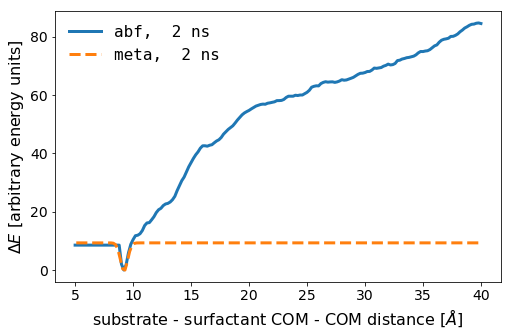

In [255]:
linestyles = ['-', '--', ':', '-.']
for i, (file, data) in enumerate(other_pmf_files_dict.items()):
    label="{:s},{: 3d} {:s}".format(
        data['method'], 
        int(data['time']), 
        data['timeUnit'])  
    plt.plot(data['pmf'].index, data['pmf'], 
        label=label,
        linestyle=linestyles[i%len(linestyles)])
plt.legend(frameon=False,prop={'family': 'monospace'})
plt.xlabel('substrate - surfactant COM - COM distance [$\AA$]')
plt.ylabel('$\Delta E$ [arbitrary energy units]')

Text(0, 0.5, '$\\Delta E$ [arbitrary energy units]')

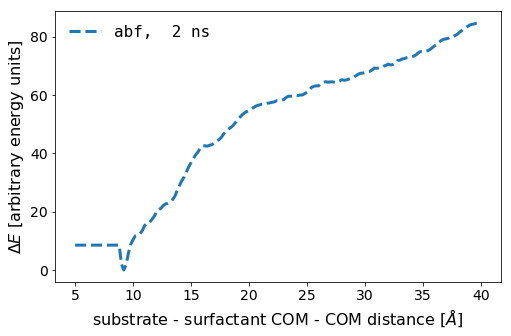

In [256]:
linestyles = ['-', '--', ':', '-.']

file = '1_SDS_on_AU_111_12x7x2_2_ns_abf.pmf'
data = other_pmf_files_dict[file]
label="{:s},{: 3d} {:s}".format(
    data['method'], 
    int(data['time']), 
    data['timeUnit'])  
plt.plot(data['pmf'].index, data['pmf'], 
    label=label,
    linestyle=linestyles[i%len(linestyles)])

file = '1_SDS_on_AU_111_12x7x2_2_ns_abf.pmf'
data = other_pmf_files_dict[file]
label="{:s},{: 3d} {:s}".format(
    data['method'], 
    int(data['time']), 
    data['timeUnit'])  
plt.plot(data['pmf'].index, data['pmf'], 
    label=label,
    linestyle=linestyles[i%len(linestyles)])

plt.legend(frameon=False,prop={'family': 'monospace'})
plt.xlabel('substrate - surfactant COM - COM distance [$\AA$]')
plt.ylabel('$\Delta E$ [arbitrary energy units]')

## TI Force

### First Glimpse

In [259]:
ti_force_files = sorted(glob.glob('1_SDS_on_AU_111_12x7x2*.force'))

In [260]:
ti_force_files

['1_SDS_on_AU_111_12x7x2_20_ps_smd.surfactant_pulled.ti.force',
 '1_SDS_on_AU_111_12x7x2_20_ps_us.surfactant_pulled.ti.force',
 '1_SDS_on_AU_111_12x7x2_2_ns_999_w_us.surfactant_pulled.ti.force',
 '1_SDS_on_AU_111_12x7x2_2_ns_99_w_us.surfactant_pulled.ti.force',
 '1_SDS_on_AU_111_12x7x2_2_ns_meta.meta.ti.force',
 '1_SDS_on_AU_111_12x7x2_2_ns_smd.surfactant_pulled.ti.force',
 '1_SDS_on_AU_111_12x7x2_2_ns_us.surfactant_pulled.ti.force']

In [36]:
ti_force_file_name = '1_SDS_on_AU_111_12x7x2_2_ns_smd.surfactant_pulled.ti.force'

In [37]:
with open(ti_force_file_name,'r') as f:
    for i in range(10):
        print(f.readline(),end='')

# 1
#          5         1        35  0

 5.5  0
 6.5  0
 7.5  0
 8.5  48.8272
 9.5  13.1452
 10.5  -6.09354
 11.5  -1.98848


In [38]:
ti_force_df = postprocessing.read_data_with_hashed_header(ti_force_file_name)

In [39]:
ti_force_df.head()

1
5.5   0.0000
6.5   0.0000
7.5   0.0000
8.5  48.8272
9.5  13.1452

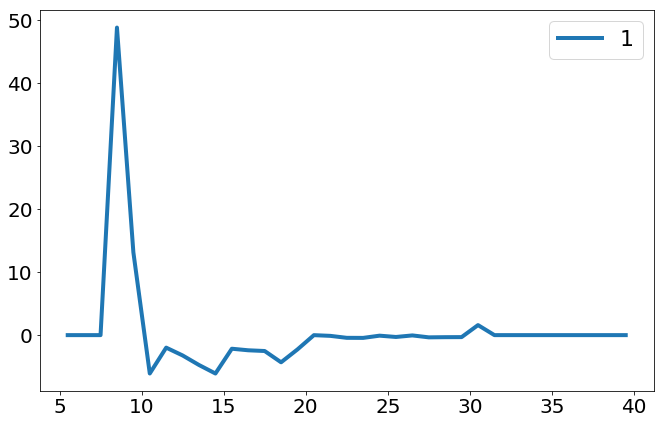

In [40]:
ti_force_df.plot()

### General

In [281]:
ti_force_files

['1_SDS_on_AU_111_12x7x2_20_ps_smd.surfactant_pulled.ti.force',
 '1_SDS_on_AU_111_12x7x2_20_ps_us.surfactant_pulled.ti.force',
 '1_SDS_on_AU_111_12x7x2_2_ns_999_w_us.surfactant_pulled.ti.force',
 '1_SDS_on_AU_111_12x7x2_2_ns_99_w_us.surfactant_pulled.ti.force',
 '1_SDS_on_AU_111_12x7x2_2_ns_meta.meta.ti.force',
 '1_SDS_on_AU_111_12x7x2_2_ns_smd.surfactant_pulled.ti.force',
 '1_SDS_on_AU_111_12x7x2_2_ns_us.surfactant_pulled.ti.force']

In [282]:
regex = re.compile('1_SDS_on_AU_111_12x7x2_(?P<time>\d+)_(?P<timeUnit>[^_]+)_(?P<method>[^.]+)\..*')
ti_force_files_dict = {}
for file in ti_force_files:
    m = regex.match(file)
    ti_force_files_dict.update(
        {
            file: {
                'method':   m.group('method'),
                'time':     m.group('time'),
                'timeUnit': m.group('timeUnit')
            }
        }
    )
    m = re.match("(?P<windows>\d+)_w_us",
                    ti_force_files_dict[file]['method'])
    if m is not None:
        ti_force_files_dict[file]['method'] = 'us'
        ti_force_files_dict[file]['windows'] = m.group('windows')
    elif ti_force_files_dict[file]['method'] == 'us':
        ti_force_files_dict[file]['windows'] = 9

In [283]:
for file, data in ti_force_files_dict.items():
    force_df = pd.read_csv(file,
            names=['xi','F'],
            index_col=0,
            comment='#',delimiter='\s*',header=None)
    ti_force_files_dict[file]['ti.force'] = force_df


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """
/usr/lib/python3/dist-packages/pandas/io/parsers.py:2227: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/usr/lib/python3/dist-packages/pandas/io/parsers.py:2229: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


Text(0, 0.5, 'F [arbitrary energy units]')

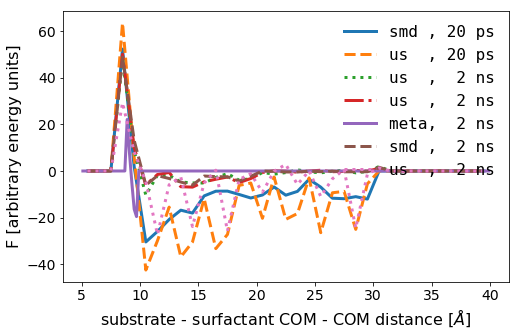

In [292]:
linestyles = ['-', '--', ':', '-.']
for i, (file, data) in enumerate(ti_force_files_dict.items()):
    label="{:4s},{: 3d} {:s}".format(
        data['method'], 
        int(data['time']), 
        data['timeUnit'])  
    plt.plot(data['ti.force'].index, data['ti.force'], 
        label=label,
        linestyle=linestyles[i%len(linestyles)])
plt.legend(frameon=False,prop={'family': 'monospace'},loc='upper right')
plt.xlabel('substrate - surfactant COM - COM distance [$\AA$]')
plt.ylabel('F [arbitrary energy units]')

Text(0, 0.5, 'F [arbitrary force units]')

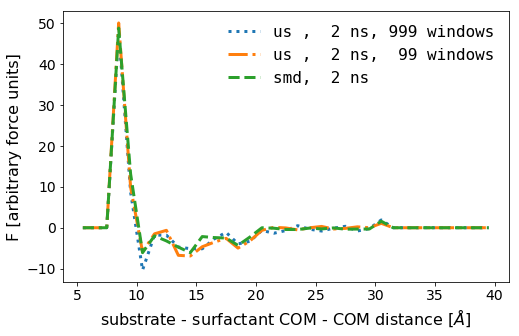

In [296]:
linestyles = ['-', '--', ':', '-.']
for i, (file, data) in enumerate(ti_force_files_dict.items()):
    if data['method'] == 'us' and int(data['windows']) >= 99:
        label="{:3s},{: 3d} {:s},{: 4d} windows".format(
            data['method'], 
            int(data['time']), 
            data['timeUnit'],
            int(data['windows']) ) 
        plt.plot(data['ti.force'].index, data['ti.force'], 
            label=label,
            linestyle=linestyles[i%len(linestyles)])
    elif data['method'] == 'smd' and int(data['time']) == 2:
        label="{:3s},{: 3d} {:s}".format(
            data['method'], 
            int(data['time']), 
            data['timeUnit'])  
        plt.plot(data['ti.force'].index, data['ti.force'], 
            label=label,
            linestyle=linestyles[i%len(linestyles)])
plt.legend(frameon=False,prop={'family': 'monospace'})
plt.xlabel('substrate - surfactant COM - COM distance [$\AA$]')
plt.ylabel('F [arbitrary force units]')

Text(0, 0.5, 'F [arbitrary force units]')

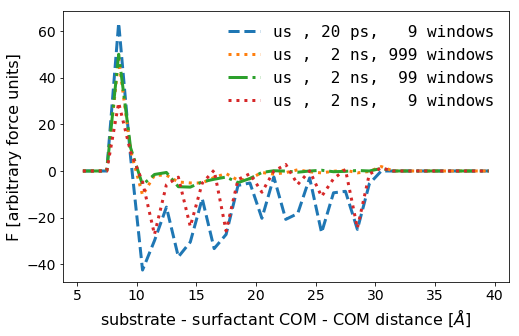

In [297]:
linestyles = ['-', '--', ':', '-.']
for i, (file, data) in enumerate(ti_force_files_dict.items()):
    if data['method'] == 'us' and int(data['windows']):
        label="{:3s},{: 3d} {:s},{: 4d} windows".format(
            data['method'], 
            int(data['time']), 
            data['timeUnit'],
            int(data['windows']) ) 
        plt.plot(data['ti.force'].index, data['ti.force'], 
            label=label,
            linestyle=linestyles[i%len(linestyles)])
plt.legend(frameon=False,prop={'family': 'monospace'})
plt.xlabel('substrate - surfactant COM - COM distance [$\AA$]')
plt.ylabel('F [arbitrary force units]')

Text(0, 0.5, 'F [arbitrary force units]')

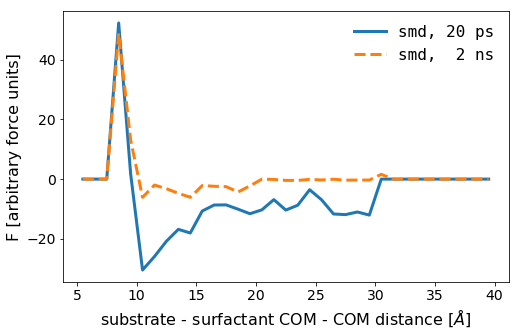

In [298]:
linestyles = ['-', '--', ':', '-.']
for i, (file, data) in enumerate(ti_force_files_dict.items()):
    if data['method'] == 'smd':
        label="{:3s},{: 3d} {:s}".format(
            data['method'], 
            int(data['time']), 
            data['timeUnit'])  
        plt.plot(data['ti.force'].index, data['ti.force'], 
            label=label,
            linestyle=linestyles[i%len(linestyles)])
plt.legend(frameon=False,prop={'family': 'monospace'})
plt.xlabel('substrate - surfactant COM - COM distance [$\AA$]')
plt.ylabel('F [arbitrary force units]')

## TI Counts

In [305]:
ti_count_files = glob.glob('1_SDS_on_AU_111_12x7x2*.ti.count')

In [306]:
ti_count_files

['1_SDS_on_AU_111_12x7x2_20_ps_smd.surfactant_pulled.ti.count',
 '1_SDS_on_AU_111_12x7x2_2_ns_meta.meta.ti.count',
 '1_SDS_on_AU_111_12x7x2_20_ps_us.surfactant_pulled.ti.count',
 '1_SDS_on_AU_111_12x7x2_2_ns_999_w_us.surfactant_pulled.ti.count',
 '1_SDS_on_AU_111_12x7x2_2_ns_us.surfactant_pulled.ti.count',
 '1_SDS_on_AU_111_12x7x2_2_ns_99_w_us.surfactant_pulled.ti.count',
 '1_SDS_on_AU_111_12x7x2_2_ns_smd.surfactant_pulled.ti.count']

In [301]:
ti_count_file_name = '1_SDS_on_AU_111_12x7x2_2_ns_smd.surfactant_pulled.ti.count'

In [302]:
with open(ti_count_file_name,'r') as f:
    for i in range(10):
        print(f.readline(),end='')

# 1
#          5         1        35  0

 5.5  0
 6.5  0
 7.5  0
 8.5  36500
 9.5  193783
 10.5  15502
 11.5  47325


In [303]:
ti_count_df = pd.read_csv(ti_count_file_name,
            names=['xi','N'],
            index_col=0,
            comment='#',delimiter='\s*',header=None)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


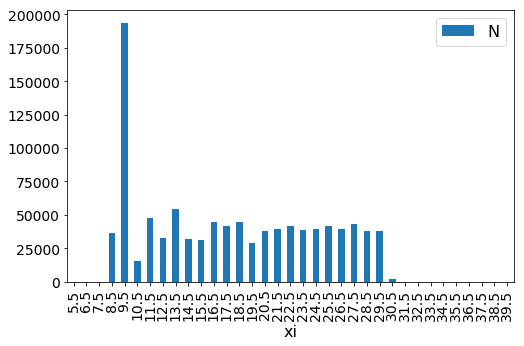

In [304]:
ti_count_df.plot(kind='bar')

### General

In [334]:
regex = re.compile('1_SDS_on_AU_111_12x7x2_(?P<time>\d+)_(?P<timeUnit>[^_]+)_(?P<method>[^.]+)\..*')
ti_count_files_dict = {}
for file in ti_count_files:
    m = regex.match(file)
    ti_count_files_dict.update(
        {
            file: {
                'method':   m.group('method'),
                'time':     m.group('time'),
                'timeUnit': m.group('timeUnit')
            }
        }
    )
    m = re.match("(?P<windows>\d+)_w_us",
                    ti_count_files_dict[file]['method'])
    if m is not None:
        ti_count_files_dict[file]['method'] = 'us'
        ti_count_files_dict[file]['windows'] = m.group('windows')
    elif ti_count_files_dict[file]['method'] == 'us':
        ti_count_files_dict[file]['windows'] = 9

In [335]:
for file, data in ti_count_files_dict.items():
    count_df = pd.read_csv(file,
            names=['xi','N'],
            index_col=0,
            comment='#',delimiter='\s*',header=None)
    ti_count_files_dict[file]['ti.count'] = count_df


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """
/usr/lib/python3/dist-packages/pandas/io/parsers.py:2227: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/usr/lib/python3/dist-packages/pandas/io/parsers.py:2229: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


In [336]:
for i, (file, data) in enumerate(ti_count_files_dict.items()):
    print(file,':', len(data['ti.count']))

1_SDS_on_AU_111_12x7x2_20_ps_smd.surfactant_pulled.ti.count : 35
1_SDS_on_AU_111_12x7x2_2_ns_meta.meta.ti.count : 175
1_SDS_on_AU_111_12x7x2_20_ps_us.surfactant_pulled.ti.count : 35
1_SDS_on_AU_111_12x7x2_2_ns_999_w_us.surfactant_pulled.ti.count : 35
1_SDS_on_AU_111_12x7x2_2_ns_us.surfactant_pulled.ti.count : 35
1_SDS_on_AU_111_12x7x2_2_ns_99_w_us.surfactant_pulled.ti.count : 35
1_SDS_on_AU_111_12x7x2_2_ns_smd.surfactant_pulled.ti.count : 35


In [338]:
data['ti.count'].head()

N
xi         
5.5       0
6.5       0
7.5       0
8.5   36500
9.5  193783

In [383]:
plt.rcParams["figure.figsize"] = (20,5) # the standard figure size

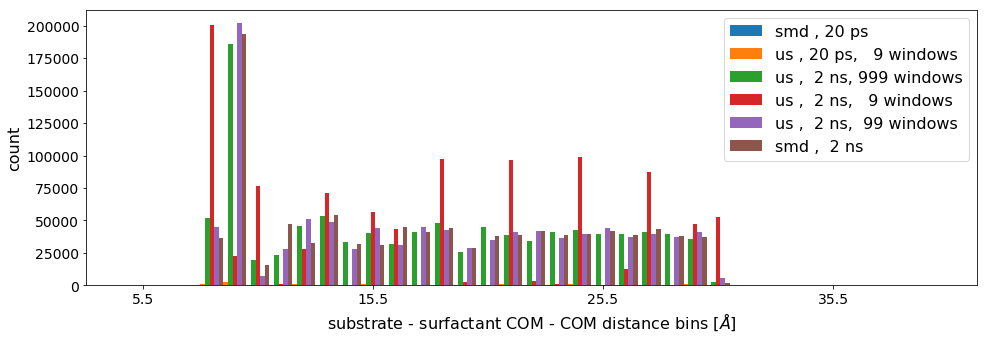

In [353]:
fig, ax = plt.subplots()

#ind = np.arange(len(data['ti.count']))  # the x locations for the groups
ind = data['ti.count'].index  # the x locations for the groups
width = 0.2  # the width of the bars

nbars = 0
for i, (file, data) in enumerate(ti_count_files_dict.items()):
    if data['method'] != 'meta':
        nbars = nbars + 1

linestyles = ['-', '--', ':', '-.']
i = 0
for file, data in ti_count_files_dict.items():
    if data['method'] != 'meta':
        cur_ind = ind - nbars/2*width + i*width
        label="{:4s},{: 3d} {:s}".format(
            data['method'], 
            int(data['time']), 
            data['timeUnit'])  
        if data['method'] == 'us':
            label="{:3s},{: 3d} {:s},{: 4d} windows".format(
            data['method'], 
            int(data['time']), 
            data['timeUnit'],
            int(data['windows']) ) 
        ax.bar(cur_ind, data['ti.count']['N'], width,
            label=label)
        i = i + 1
plt.legend(frameon=False,prop={'family': 'monospace'},loc='upper right')
ax.set_xlabel('substrate - surfactant COM - COM distance bins [$\AA$]')
ax.set_ylabel('count')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xticks(ind[::10])
ax.set_xticklabels(ind[::10])
ax.legend()
fig.tight_layout()

plt.show()

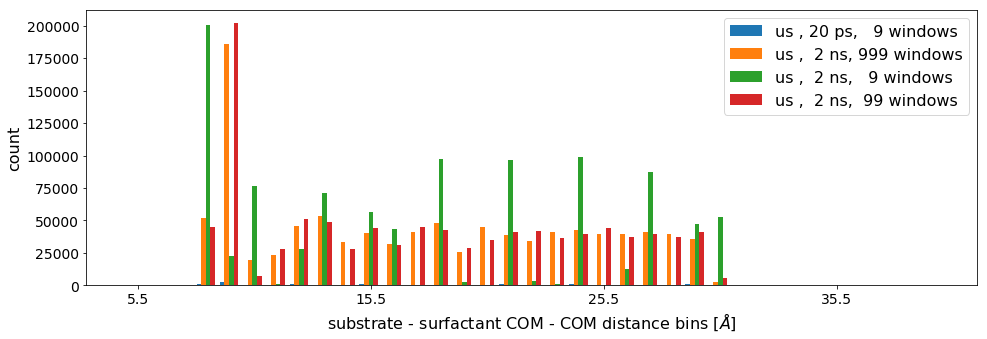

In [354]:
fig, ax = plt.subplots()

#ind = np.arange(len(data['ti.count']))  # the x locations for the groups
ind = data['ti.count'].index  # the x locations for the groups
width = 0.4  # the width of the bars

nbars = 0
for i, (file, data) in enumerate(ti_count_files_dict.items()):
    if data['method'] == 'us':
        nbars = nbars + 1

linestyles = ['-', '--', ':', '-.']
i = 0
for file, data in ti_count_files_dict.items():
    if data['method'] == 'us':
        cur_ind = ind - nbars/2*width + i*width
        label="{:4s},{: 3d} {:s}".format(
            data['method'], 
            int(data['time']), 
            data['timeUnit'])  
        if data['method'] == 'us':
            label="{:3s},{: 3d} {:s},{: 4d} windows".format(
            data['method'], 
            int(data['time']), 
            data['timeUnit'],
            int(data['windows']) ) 
        ax.bar(cur_ind, data['ti.count']['N'], width,
            label=label)
        i = i + 1
plt.legend(frameon=False,prop={'family': 'monospace'},loc='upper right')
ax.set_xlabel('substrate - surfactant COM - COM distance bins [$\AA$]')
ax.set_ylabel('count')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xticks(ind[::10])
ax.set_xticklabels(ind[::10])
ax.legend()
fig.tight_layout()

plt.show()

In [374]:
sorted(ti_count_files_dict)

['1_SDS_on_AU_111_12x7x2_20_ps_smd.surfactant_pulled.ti.count',
 '1_SDS_on_AU_111_12x7x2_20_ps_us.surfactant_pulled.ti.count',
 '1_SDS_on_AU_111_12x7x2_2_ns_999_w_us.surfactant_pulled.ti.count',
 '1_SDS_on_AU_111_12x7x2_2_ns_99_w_us.surfactant_pulled.ti.count',
 '1_SDS_on_AU_111_12x7x2_2_ns_meta.meta.ti.count',
 '1_SDS_on_AU_111_12x7x2_2_ns_smd.surfactant_pulled.ti.count',
 '1_SDS_on_AU_111_12x7x2_2_ns_us.surfactant_pulled.ti.count']

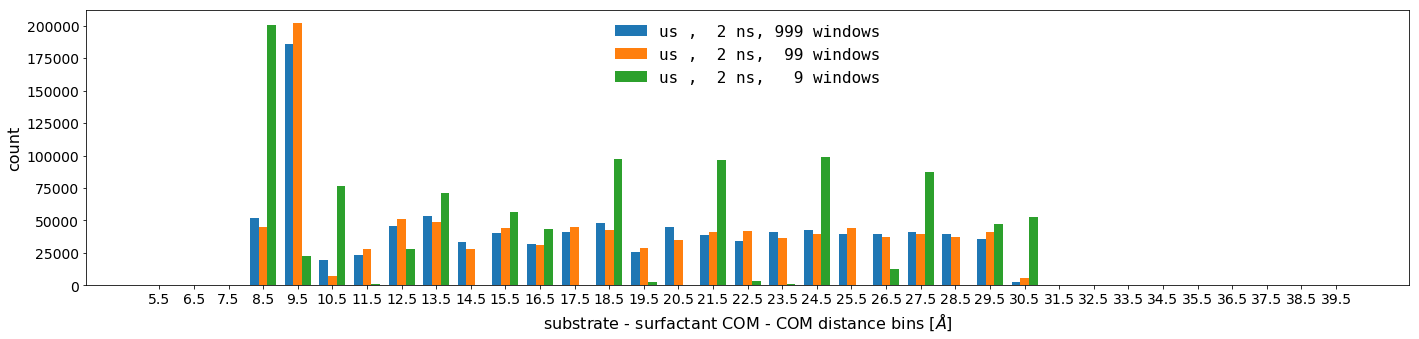

In [391]:
fig, ax = plt.subplots()

#ind = np.arange(len(data['ti.count']))  # the x locations for the groups
ind = data['ti.count'].index  # the x locations for the groups
width = 0.25  # the width of the bars

nbars = 0
for file, data in ti_count_files_dict.items():
    if data['method'] == 'us' and int(data['time']) == 2:
        nbars = nbars + 1

linestyles = ['-', '--', ':', '-.']
i = 0
for file, data in sorted(ti_count_files_dict.items()):
    if data['method'] == 'us' and int(data['time']) == 2:
        cur_ind = ind - nbars/2*width + i*width + 0.5*width
        label="{:4s},{: 3d} {:s}".format(
            data['method'], 
            int(data['time']), 
            data['timeUnit'])  
        if data['method'] == 'us':
            label="{:3s},{: 3d} {:s},{: 4d} windows".format(
            data['method'], 
            int(data['time']), 
            data['timeUnit'],
            int(data['windows']) ) 
        ax.bar(cur_ind, data['ti.count']['N'], width,
            label=label)
        i = i + 1
ax.legend(frameon=False,prop={'family': 'monospace'},loc='upper center')
ax.set_xlabel('substrate - surfactant COM - COM distance bins [$\AA$]')
ax.set_ylabel('count')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xticks(ind[::])
ax.set_xticklabels(ind[::])
fig.tight_layout()

plt.show()

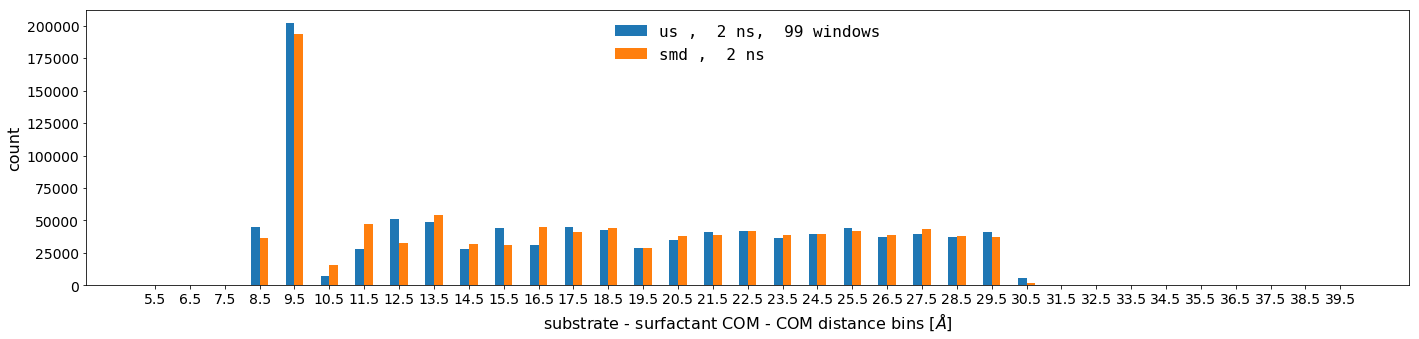

In [396]:
fig, ax = plt.subplots()

#ind = np.arange(len(data['ti.count']))  # the x locations for the groups
ind = data['ti.count'].index  # the x locations for the groups
width = 0.25  # the width of the bars

nbars = 0
for file, data in ti_count_files_dict.items():
    if  (data['method'] == 'us' and int(data['time']) == 2 and int(data['windows']) == 99) or \
        (data['method'] == 'smd' and int(data['time']) == 2):
        nbars = nbars + 1

linestyles = ['-', '--', ':', '-.']
i = 0
for file, data in sorted(ti_count_files_dict.items()):
    if  (data['method'] == 'us' and int(data['time']) == 2 and int(data['windows']) == 99) or \
        (data['method'] == 'smd' and int(data['time']) == 2):        
        cur_ind = ind - nbars/2*width + i*width + 0.5*width
        label="{:4s},{: 3d} {:s}".format(
            data['method'], 
            int(data['time']), 
            data['timeUnit'])  
        if data['method'] == 'us':
            label="{:3s},{: 3d} {:s},{: 4d} windows".format(
            data['method'], 
            int(data['time']), 
            data['timeUnit'],
            int(data['windows']) ) 
        ax.bar(cur_ind, data['ti.count']['N'], width,
            label=label)
        i = i + 1
ax.legend(frameon=False,prop={'family': 'monospace'},loc='upper center')
ax.set_xlabel('substrate - surfactant COM - COM distance bins [$\AA$]')
ax.set_ylabel('count')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xticks(ind[::])
ax.set_xticklabels(ind[::])
fig.tight_layout()

plt.show()

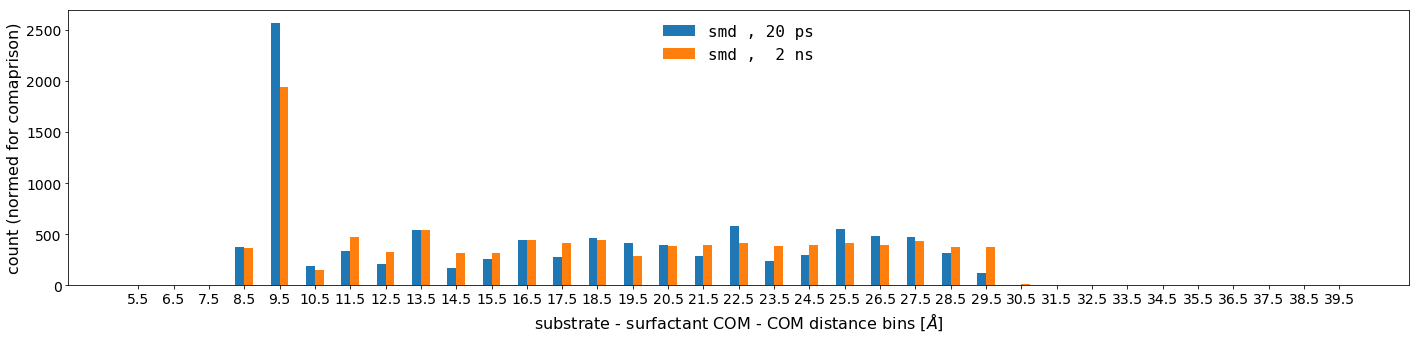

In [402]:
fig, ax = plt.subplots()

#ind = np.arange(len(data['ti.count']))  # the x locations for the groups
ind = data['ti.count'].index  # the x locations for the groups
width = 0.25  # the width of the bars

nbars = 0
for file, data in ti_count_files_dict.items():
    if data['method'] == 'smd':
        nbars = nbars + 1

linestyles = ['-', '--', ':', '-.']
i = 0
for file, data in sorted(ti_count_files_dict.items()):
    if data['method'] == 'smd':
        cur_ind = ind - nbars/2*width + i*width + 0.5*width
        label="{:4s},{: 3d} {:s}".format(
            data['method'], 
            int(data['time']), 
            data['timeUnit'])  
        if data['method'] == 'us':
            label="{:3s},{: 3d} {:s},{: 4d} windows".format(
            data['method'], 
            int(data['time']), 
            data['timeUnit'],
            int(data['windows']) ) 
        norm_factor = 1
        if int(data['time']) == 2: norm_factor = 100
        ax.bar(cur_ind, data['ti.count']['N']/norm_factor, width,
            label=label)
        i = i + 1
ax.legend(frameon=False,prop={'family': 'monospace'},loc='upper center')
ax.set_xlabel('substrate - surfactant COM - COM distance bins [$\AA$]')
ax.set_ylabel('count (normed for comaprison)')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xticks(ind[::])
ax.set_xticklabels(ind[::])
fig.tight_layout()

plt.show()

## Colvars Trajectory

In [47]:
glob.glob('1_SDS_on_AU_111_12x7x2*.colvars.traj')

['1_SDS_on_AU_111_12x7x2_2_ns_meta.colvars.traj',
 '1_SDS_on_AU_111_12x7x2_2_ns_smd.colvars.traj',
 '1_SDS_on_AU_111_12x7x2_2_ns_us.colvars.traj',
 '1_SDS_on_AU_111_12x7x2_2_ns_99_w_us.colvars.traj',
 '1_SDS_on_AU_111_12x7x2_20_ps_smd.colvars.traj',
 '1_SDS_on_AU_111_12x7x2_20_ps_us.colvars.traj',
 '1_SDS_on_AU_111_12x7x2_2_ns_999_w_us.colvars.traj',
 '1_SDS_on_AU_111_12x7x2_2_ns_abf.colvars.traj']

In [48]:
cv_traj_file_name = '1_SDS_on_AU_111_12x7x2_2_ns_smd.colvars.traj'

In [49]:
with open(cv_traj_file_name,'r') as f:
    for i in range(4):
        print(f.readline(),end='')

# step         sf_com_sb_com_dist    v_sf_com_sb_com_dist  ft_sf_com_sb_com_dist fa_sf_com_sb_com_dist  sf_com_sb_com_dist_z  v_sf_com_sb_com_dist_ ft_sf_com_sb_com_dist fa_sf_com_sb_com_dist  E_surfactant_pulled   x0_sf_com_sb_com_dist W_surfactant_pulled  
           0    9.23951317225458e+00  0.00000000000000e+00  0.00000000000000e+00  0.00000000000000e+00   9.23655501103990e+00  0.00000000000000e+00  0.00000000000000e+00 -6.35483251655985e+01   1.34612987711755e+02  5.00000000000000e+00  0.00000000000000e+00
        1000    9.11504657044965e+00  4.58031158342642e-04 -9.25415850975630e+00  0.00000000000000e+00   9.09941876197890e+00  4.12915208952036e-04 -9.30182789414316e+00 -6.11162814296834e+01   1.24506661859742e+02  5.02500000000000e+00 -1.48764040446187e+00
        2000    9.00200418560711e+00 -6.12959445708938e-04  5.57479095683941e-01  0.00000000000000e+00   8.99107908666709e+00 -5.86809012148137e-04  7.75800975233225e-01 -5.91161863000063e+01   1.16490782755235e+02  5.05000

In [50]:
cv_traj_df = postprocessing.read_data_with_hashed_header(cv_traj_file_name)

In [51]:
cv_traj_df.head()

step  sf_com_sb_com_dist  v_sf_com_sb_com_dist  ft_sf_com_sb_com_dist  \
0     0            9.239513              0.000000               0.000000   
1  1000            9.115047              0.000458              -9.254159   
2  2000            9.002004             -0.000613               0.557479   
3  3000            9.027169             -0.000625             -10.271455   
4  4000            9.036519              0.000047              -2.565676   

   fa_sf_com_sb_com_dist  sf_com_sb_com_dist_z  v_sf_com_sb_com_dist_  \
0                    0.0              9.236555               0.000000   
1                    0.0              9.099419               0.000413   
2                    0.0              8.991079              -0.000587   
3                    0.0              9.024507              -0.000586   
4                    0.0              9.033906               0.000029   

   ft_sf_com_sb_com_dist.1  fa_sf_com_sb_com_dist.1  E_surfactant_pulled  \
0                 0.000000               -63.548325           134.612988   
1                -9.301828               -61.116281           124.506662   
2                 0.775801               -59.116186           116.490783   
3                -9.975174               -59.242604           116.989538   
4                -2.712743               -59.008585           116.067104   

   x0_sf_com_sb_com_dist  W_surfactant_pulled  
0                  5.000             0.000000  
1                  5.025            -1.487640  
2                  5.050            -2.972585  
3                  5.075            -4.441377  
4                  5.100            -5.904973

In [52]:
cv_traj_df.set_index('step',inplace=True)

In [53]:
cv_traj_df.head()

sf_com_sb_com_dist  v_sf_com_sb_com_dist  ft_sf_com_sb_com_dist  \
step                                                                    
0               9.239513              0.000000               0.000000   
1000            9.115047              0.000458              -9.254159   
2000            9.002004             -0.000613               0.557479   
3000            9.027169             -0.000625             -10.271455   
4000            9.036519              0.000047              -2.565676   

      fa_sf_com_sb_com_dist  sf_com_sb_com_dist_z  v_sf_com_sb_com_dist_  \
step                                                                       
0                       0.0              9.236555               0.000000   
1000                    0.0              9.099419               0.000413   
2000                    0.0              8.991079              -0.000587   
3000                    0.0              9.024507              -0.000586   
4000                    0.0              9.033906               0.000029   

      ft_sf_com_sb_com_dist.1  fa_sf_com_sb_com_dist.1  E_surfactant_pulled  \
step                                                                          
0                    0.000000               -63.548325           134.612988   
1000                -9.301828               -61.116281           124.506662   
2000                 0.775801               -59.116186           116.490783   
3000                -9.975174               -59.242604           116.989538   
4000                -2.712743               -59.008585           116.067104   

      x0_sf_com_sb_com_dist  W_surfactant_pulled  
step                                              
0                     5.000             0.000000  
1000                  5.025            -1.487640  
2000                  5.050            -2.972585  
3000                  5.075            -4.441377  
4000                  5.100            -5.904973

### Distances

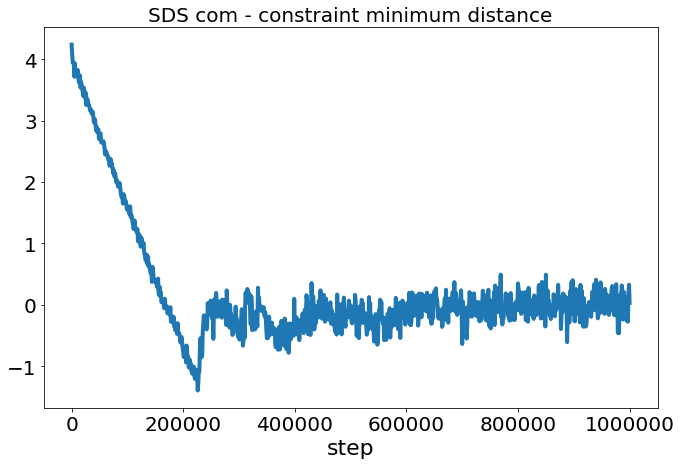

In [54]:
(cv_traj_df['sf_com_sb_com_dist_z']-cv_traj_df['x0_sf_com_sb_com_dist']).plot(
    title='SDS com - constraint minimum distance')


/usr/lib/python3/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


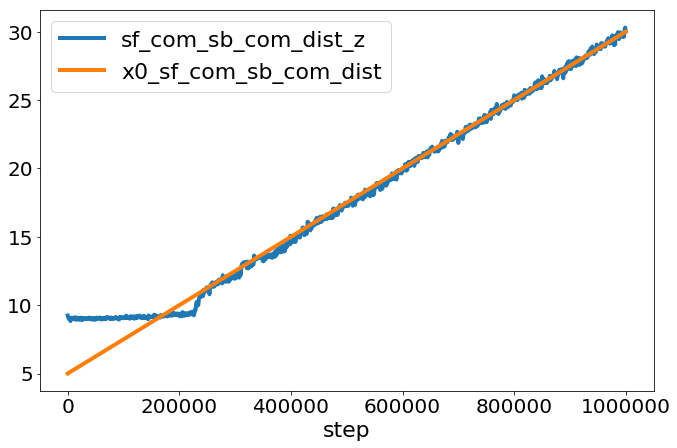

In [55]:
cv_traj_df.plot(y=['sf_com_sb_com_dist_z','x0_sf_com_sb_com_dist'])

In [56]:
cv_traj_df.columns

Index(['sf_com_sb_com_dist', 'v_sf_com_sb_com_dist', 'ft_sf_com_sb_com_dist',
       'fa_sf_com_sb_com_dist', 'sf_com_sb_com_dist_z',
       'v_sf_com_sb_com_dist_', 'ft_sf_com_sb_com_dist.1',
       'fa_sf_com_sb_com_dist.1', 'E_surfactant_pulled',
       'x0_sf_com_sb_com_dist', 'W_surfactant_pulled'],
      dtype='object')

### Velocity

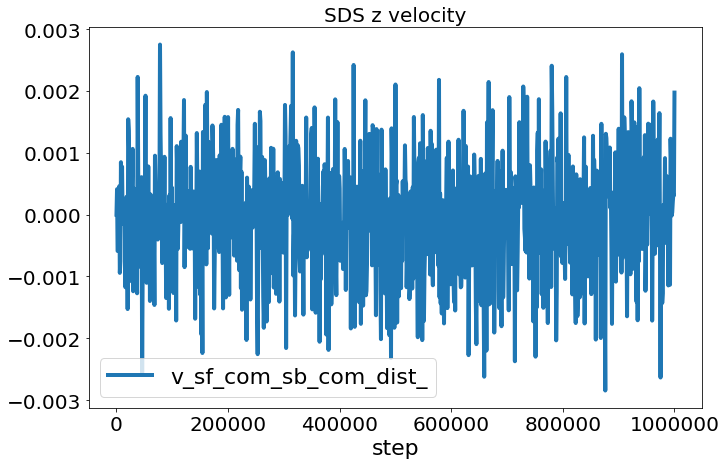

In [57]:
cv_traj_df.plot(y='v_sf_com_sb_com_dist_', title='SDS z velocity')

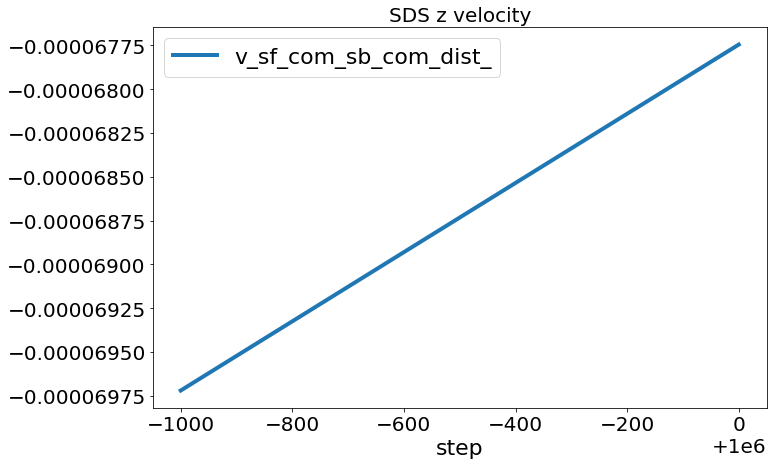

In [59]:
cv_traj_df.rolling(1000).mean().plot(y='v_sf_com_sb_com_dist_', title='SDS z velocity')

### Forces

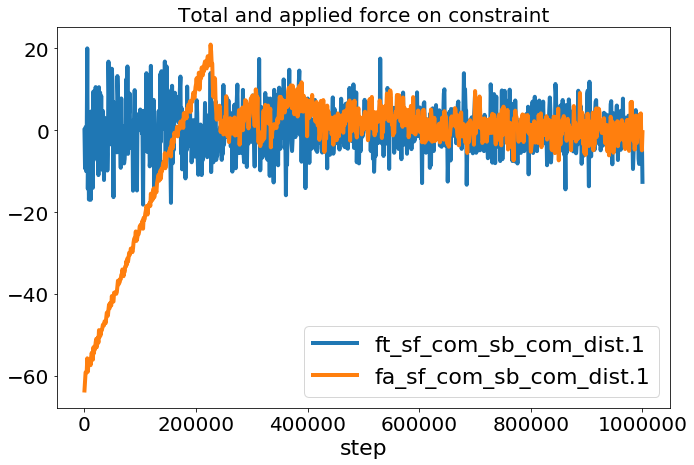

In [60]:
cv_traj_df.plot(
    y=['ft_sf_com_sb_com_dist.1','fa_sf_com_sb_com_dist.1'], 
    title='Total and applied force on constraint')

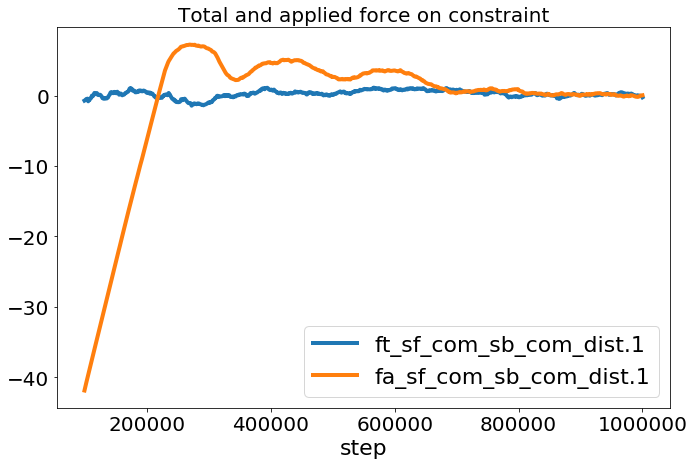

In [61]:
cv_traj_df.rolling(100).mean().plot(
    y=['ft_sf_com_sb_com_dist.1','fa_sf_com_sb_com_dist.1'], 
    title='Total and applied force on constraint')

### Energy & Work

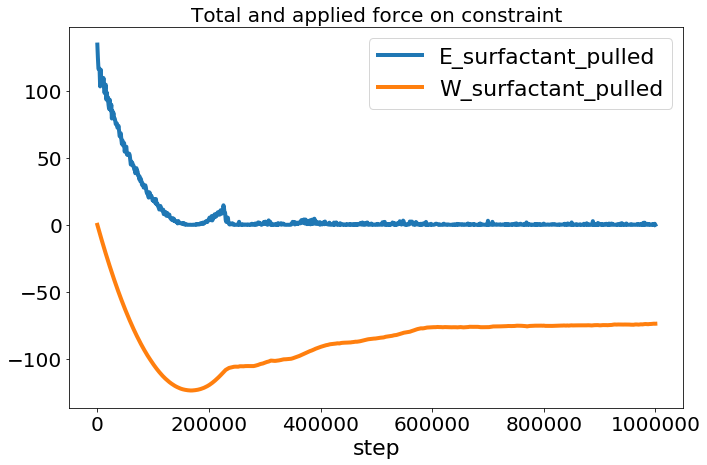

In [62]:
cv_traj_df.plot(
    y=['E_surfactant_pulled','W_surfactant_pulled'], 
    title='Total and applied force on constraint')

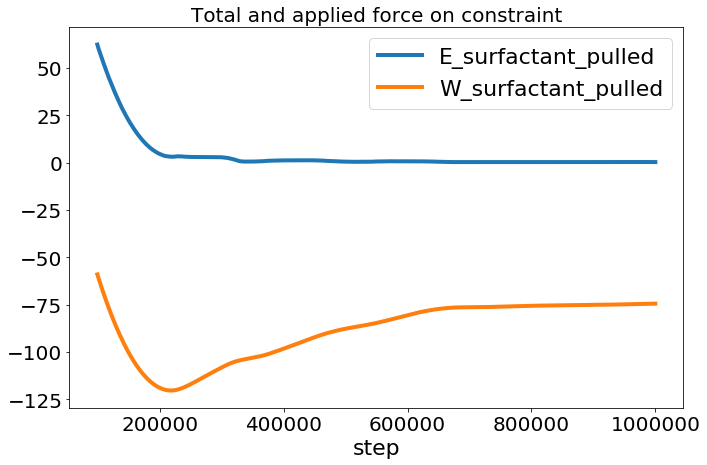

In [63]:
cv_traj_df.rolling(100).mean().plot(
    y=['E_surfactant_pulled','W_surfactant_pulled'], 
    title='Total and applied force on constraint')

## Running average 

In [65]:
glob.glob('1_SDS_on_AU_111_12x7x2*.sf_com_sb_com_dist_z.runave.traj')

['1_SDS_on_AU_111_12x7x2_2_ns_smd.sf_com_sb_com_dist_z.runave.traj',
 '1_SDS_on_AU_111_12x7x2_20_ps_smd.sf_com_sb_com_dist_z.runave.traj',
 '1_SDS_on_AU_111_12x7x2_2_ns_999_w_us.sf_com_sb_com_dist_z.runave.traj',
 '1_SDS_on_AU_111_12x7x2_20_ps_us.sf_com_sb_com_dist_z.runave.traj',
 '1_SDS_on_AU_111_12x7x2_2_ns_us.sf_com_sb_com_dist_z.runave.traj',
 '1_SDS_on_AU_111_12x7x2_2_ns_99_w_us.sf_com_sb_com_dist_z.runave.traj',
 '1_SDS_on_AU_111_12x7x2_2_ns_abf.sf_com_sb_com_dist_z.runave.traj',
 '1_SDS_on_AU_111_12x7x2_2_ns_meta.sf_com_sb_com_dist_z.runave.traj']

In [66]:
runave_traj_file_name = '1_SDS_on_AU_111_12x7x2_2_ns_smd.sf_com_sb_com_dist_z.runave.traj'

In [67]:
with open(runave_traj_file_name,'r') as f:
    for i in range(4):
        print(f.readline(),end='')

# step         running average       running stddev       
        1000    8.97955357856491e+00  1.38189544595485e-01
        1001    8.98865370728381e+00  1.38799425263824e-01
        1002    8.98851923145614e+00  1.39258847904156e-01


In [68]:
runave_traj_df = pd.read_csv(runave_traj_file_name,
            names=['step','running average','running stddev'],
            index_col=0,
            comment='#',delimiter='\s*',header=None)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.
/usr/lib/python3/dist-packages/pandas/io/parsers.py:2227: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/usr/lib/python3/dist-packages/pandas/io/parsers.py:2229: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


In [69]:
runave_traj_df.head()

running average  running stddev
step                                 
1000         8.979554        0.138190
1001         8.988654        0.138799
1002         8.988519        0.139259
1003         8.988387        0.139640
1004         8.988257        0.139961

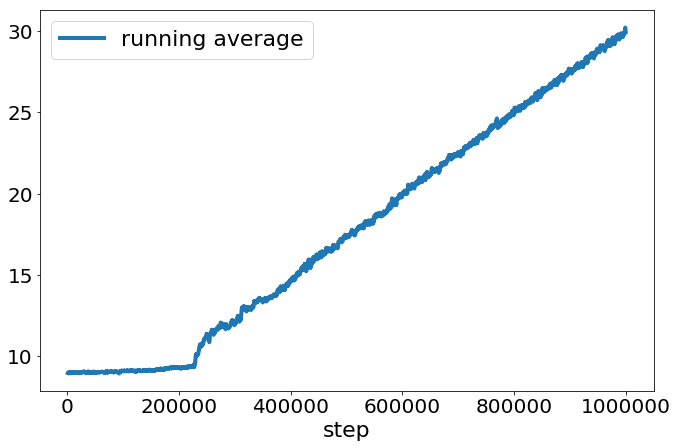

In [70]:
runave_traj_df.plot(y='running average')

In [71]:
len(runave_traj_df)

999001

In [72]:
interval = 10000
errlimits = [*[False]*(interval-1), True]*int(len(runave_traj_df)/interval) \
    + [ False ]* (len(runave_traj_df) % interval)

In [73]:
np.where(errlimits)

(array([  9999,  19999,  29999,  39999,  49999,  59999,  69999,  79999,
         89999,  99999, 109999, 119999, 129999, 139999, 149999, 159999,
        169999, 179999, 189999, 199999, 209999, 219999, 229999, 239999,
        249999, 259999, 269999, 279999, 289999, 299999, 309999, 319999,
        329999, 339999, 349999, 359999, 369999, 379999, 389999, 399999,
        409999, 419999, 429999, 439999, 449999, 459999, 469999, 479999,
        489999, 499999, 509999, 519999, 529999, 539999, 549999, 559999,
        569999, 579999, 589999, 599999, 609999, 619999, 629999, 639999,
        649999, 659999, 669999, 679999, 689999, 699999, 709999, 719999,
        729999, 739999, 749999, 759999, 769999, 779999, 789999, 799999,
        809999, 819999, 829999, 839999, 849999, 859999, 869999, 879999,
        889999, 899999, 909999, 919999, 929999, 939999, 949999, 959999,
        969999, 979999, 989999]),)

In [74]:
len(errlimits)

999001

<ErrorbarContainer object of 3 artists>

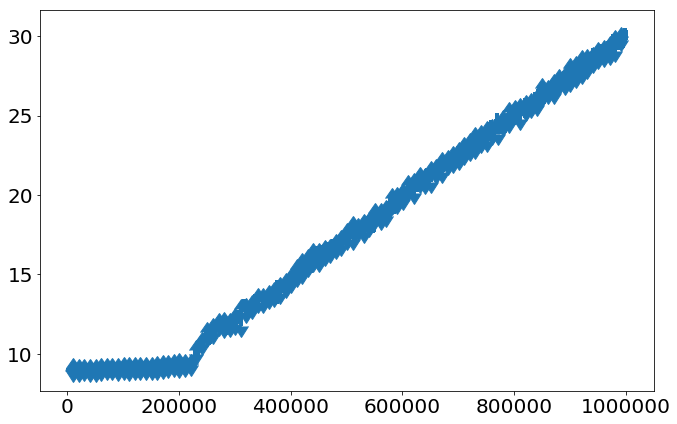

In [75]:
plt.errorbar(
    x=runave_traj_df.index,
    y=runave_traj_df['running average'],
    yerr=runave_traj_df['running stddev'],
    xerr=None,
    uplims = errlimits, lolims = errlimits)